In [1]:
#Question 1

import pandas as pd 
import numpy as np 
import string
from collections import Counter
import re
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

def load_text(file):
    allwords = file.read()
    allwords = allwords.lower()
    table = str.maketrans({key: None for key in string.punctuation})
    s = allwords.translate(table) 
    words = re.findall(r'\w+', s)
    words.remove('0')
    words.remove('1')
    return words

def sort(words):
    most_frequent_words = Counter(words).most_common(10000)
    frequent_words = []
    for i in range(10000):
        frequent_words.append([most_frequent_words[i][0],i,most_frequent_words[i][1]])
    return frequent_words

def hashMap(words):
    comment_map = {}
    for i in range(len(words)):
        comment_map[words[i][0]] = [words[i][1],words[i][2]]
    return comment_map

def write_txt(list,file):
    for i in range(len(list)):
        file.write(list[i][0]+'\t'+str(list[i][1])+'\t'+str(list[i][2])+'\n')

def modify(file,vocab_map):
    comments = file.readlines()
    review = []
    for i in range(len(comments)):
        number_review = []
        line = re.findall(r'\w+', comments[i].lower())
        for i in range(len(line)-1):
            if(line[i] in vocab_map ):
                number_review.append(vocab_map[line[i]][0])
        number_review.append(int(line[len(line)-1]))
        review.append(number_review)
    return review

def write_train_valid_test(data,file):
    for i in range(len(data)):
        for j in range(len(data[i])-2):
            file.write(str(data[i][j])+' ')
        file.write(str(data[i][len(data[i])-2])+'\t')
        file.write(str(data[i][len(data[i])-1]))
        file.write('\n')

def BBoW(data):
    bbow = []
    for i in range(len(data)):
        line = [0] * 10000
        for j in range(len(data[i])):
            line[data[i][j]]=1
        bbow.append(line)
    return bbow

def get_classes(data_list):
    classes = []
    for i in range(len(data_list)):
        classes.append(data_list[i][len(data_list[i])-1])
    return classes

def f1_random(X,y,test_X,test_y,stra):
    dummy_classifier = DummyClassifier(strategy=stra)
    dummy_classifier.fit( X,y )
    prediction = []
    for i in range(len(test_X)):
        predict = dummy_classifier.predict([test_X[i]])[0]
        prediction.append(predict)
    prediction = np.array(prediction)
    return f1_score(test_y,prediction,average='micro')

def f1_NB(X,y,test_X,test_y,alpha):
    clf = BernoulliNB()
    clf.alpha = alpha
    clf.fit( X,y )
    prediction = []
    for i in range(len(test_X)):
        predict = clf.predict([test_X[i]])[0]
        prediction.append(predict)
    f1 = f1_score(test_y,prediction,average='micro')
    return f1

def f1_svc(X,y,test_X,test_y,int_scal,maxIteration,ran_state,tolerence):
    clf = LinearSVC(intercept_scaling=int_scal,max_iter=maxIteration,random_state=ran_state, tol=tolerence)
    clf.fit( X,y )
    prediction = []
    for i in range(len(test_X)):
        predict = clf.predict([test_X[i]])[0]
        prediction.append(predict)
    f1 = f1_score(test_y,prediction,average='micro')
    return f1

def f1_decision_tree(X,y,test_X,test_y,maxDepth,minSplit,minLeaf,maxFeatures):
    clf = tree.DecisionTreeClassifier()
    clf.max_depth = maxDepth
    clf.min_samples_split = minSplit
    clf.min_samples_leaf = minLeaf
    clf.max_features = maxFeatures
    clf.fit( X,y )
    prediction = []
    for i in range(len(test_X)):
        predict = clf.predict([test_X[i]])[0]
        prediction.append(predict)
    f1 = f1_score(test_y,prediction,average='micro')
    return f1

def FBoW(data):
    fbow = []
    for i in range(len(data)):
        line = [0] * 10000
        for j in range(len(data[i])-1):
            line[data[i][j]]=line[data[i][j]] + 1/(len(data[i])-1)
        fbow.append(line)
    return fbow

def f1_Gaussian_NB(X,y,test_X,test_y):
    clf = GaussianNB()
    clf.fit( X,y )
    prediction = []
    for i in range(len(test_X)):
        predict = clf.predict([test_X[i]])[0]
        prediction.append(predict)
    f1 = f1_score(test_y,prediction,average='micro')
    return f1

IMDB_train_file = open('hwk3_datasets/IMDB-train.txt')
IMDB_vocab = sort(load_text(IMDB_train_file))
write_txt(IMDB_vocab,open("IMDB-modified/IMDB-vocab.txt",'w'))

yelp_train_file = open('hwk3_datasets/yelp-train.txt')
yelp_vocab = sort(load_text(yelp_train_file))
write_txt(yelp_vocab,open("yelp-modified/yelp-vocab.txt",'w'))

IMDB_map = hashMap(IMDB_vocab)
yelp_map = hashMap(yelp_vocab)

IMDB_train_review = modify(open('hwk3_datasets/IMDB-train.txt'),IMDB_map)
IMDB_valid_review = modify(open('hwk3_datasets/IMDB-valid.txt'),IMDB_map)
IMDB_test_review = modify(open('hwk3_datasets/IMDB-test.txt'),IMDB_map)

yelp_train_review = modify(open('hwk3_datasets/yelp-train.txt'),yelp_map)
yelp_valid_review = modify(open('hwk3_datasets/yelp-valid.txt'),yelp_map)
yelp_test_review = modify(open('hwk3_datasets/yelp-test.txt'),yelp_map)

write_train_valid_test(IMDB_train_review,open('IMDB-modified/IMDB_train.txt','w'))
write_train_valid_test(IMDB_valid_review,open('IMDB-modified/IMDB_valid.txt','w'))
write_train_valid_test(IMDB_test_review,open('IMDB-modified/IMDB_test.txt','w'))

write_train_valid_test(yelp_train_review,open('yelp-modified/yelp_train.txt','w'))
write_train_valid_test(yelp_valid_review,open('yelp-modified/yelp_valid.txt','w'))
write_train_valid_test(yelp_test_review,open('yelp-modified/yelp_test.txt','w'))

bbow_yelp_train = BBoW(yelp_train_review)
yelp_train_classes = get_classes(yelp_train_review)

bbow_yelp_valid = BBoW(yelp_valid_review)
yelp_valid_classes = get_classes(yelp_valid_review)

bbow_yelp_test = BBoW(yelp_test_review)
yelp_test_classes = get_classes(yelp_test_review)

bbow_IMDB_train = BBoW(IMDB_train_review)
IMDB_train_classes = get_classes(IMDB_train_review)

bbow_IMDB_valid = BBoW(IMDB_valid_review)
IMDB_valid_classes = get_classes(IMDB_valid_review)

bbow_IMDB_test = BBoW(IMDB_test_review)
IMDB_test_classes = get_classes(IMDB_test_review)

fbow_yelp_train = FBoW(yelp_train_review)
fbow_yelp_valid = FBoW(yelp_valid_review)
fbow_yelp_test = FBoW(yelp_test_review)

yelp_valid_classes = get_classes(yelp_valid_review)
yelp_train_classes = get_classes(yelp_train_review)
yelp_test_classes = get_classes(yelp_test_review)

fbow_IMDB_train = FBoW(IMDB_train_review)
fbow_IMDB_valid = FBoW(IMDB_valid_review)
fbow_IMDB_test = FBoW(IMDB_test_review)

IMDB_valid_classes = get_classes(IMDB_valid_review)
IMDB_train_classes = get_classes(IMDB_train_review)
IMDB_test_classes = get_classes(IMDB_test_review)

###############
#BBoW of yelp

X_yelp_train = np.array( bbow_yelp_train )
y_yelp_train = np.array( yelp_train_classes )

X_yelp_valid = np.array( bbow_yelp_valid )
y_yelp_valid = np.array( yelp_valid_classes )

X_yelp_test = np.array(bbow_yelp_test)
y_yelp_test = np.array(yelp_test_classes)

##############
#BBoW of IMDB

X_IMDB_train = np.array( bbow_IMDB_train )
y_IMDB_train = np.array( IMDB_train_classes )

X_IMDB_valid = np.array( bbow_IMDB_valid )
y_IMDB_valid = np.array( IMDB_valid_classes )

X_IMDB_test = np.array( bbow_IMDB_test )
y_IMDB_test = np.array( IMDB_test_classes )


##################
#FBoW of yelp

X_yelp_train_fre = np.array(fbow_yelp_train)
y_yelp_train_fre = np.array( yelp_train_classes )

X_yelp_valid_fre = np.array( fbow_yelp_valid )
y_yelp_valid_fre = np.array( yelp_valid_classes )

X_yelp_test_fre = np.array( fbow_yelp_test )
y_yelp_test_fre = np.array( yelp_test_classes )

##################
#FBoW of IMDB

X_IMDB_train_fre = np.array(fbow_IMDB_train)
y_IMDB_train_fre = np.array( IMDB_train_classes )

X_IMDB_valid_fre = np.array( fbow_IMDB_valid )
y_IMDB_valid_fre = np.array( IMDB_valid_classes )

X_IMDB_test_fre = np.array( fbow_IMDB_test )
y_IMDB_test_fre = np.array( IMDB_test_classes )


print("Question 1 finished")

Question 1 finished


In [3]:
#Question2

#(1)random uniform and majority
bbow_yelp_train = BBoW(yelp_train_review)
yelp_train_classes = get_classes(yelp_train_review)

bbow_yelp_test = BBoW(yelp_test_review)
yelp_test_classes = get_classes(yelp_test_review)

X_yelp_train = np.array( bbow_yelp_train )
y_yelp_train = np.array( yelp_train_classes )

X_yelp_test = np.array(bbow_yelp_test)
y_yelp_test = np.array(yelp_test_classes)

f1_yelp_uniform = f1_random(X_yelp_train,y_yelp_train,X_yelp_test,y_yelp_test,'uniform')
f1_yelp_majority = f1_random(X_yelp_train,y_yelp_train,X_yelp_test,y_yelp_test,'most_frequent')

f = open('Assignment3_260540022_2_a.txt','w')
f.write('uniform: ' + str(f1_yelp_uniform) + '\n' + 'majority: ' + str(f1_yelp_majority))

print('Random uniform F1: ', f1_yelp_uniform)
print('Random majority F1: ', f1_yelp_majority)



Random uniform F1:  0.1885
Random majority F1:  0.351


best alpha:  0.0100000001


24

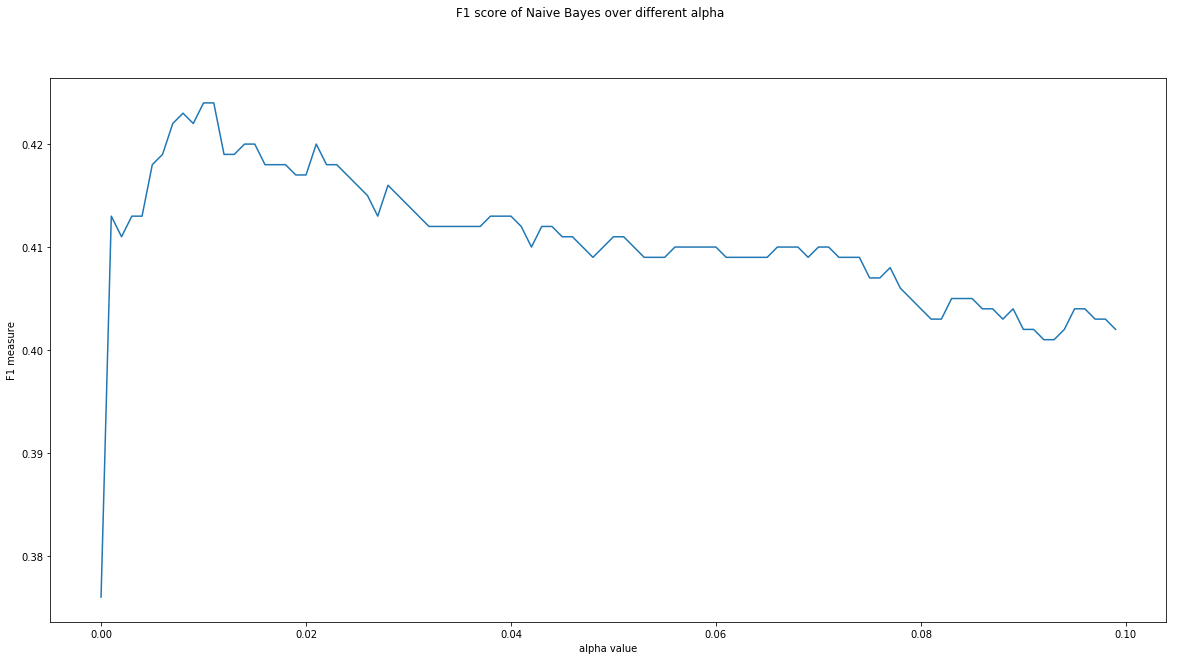

In [8]:
#(2)naive Bayes
bbow_yelp_valid = BBoW(yelp_valid_review)
yelp_valid_classes = get_classes(yelp_valid_review)

X_yelp_valid = np.array( bbow_yelp_valid )
y_yelp_valid = np.array( yelp_valid_classes )


#tune best alpha
alpha = 0.001
test_alpha = 1e-10
f1_yelp_nb_list = []
alpha_list = []
best_alpha = 0
best_f1 = 0
for i in range(100):
    f1_yelp_nb = f1_NB(X_yelp_train,y_yelp_train,X_yelp_valid,y_yelp_valid,test_alpha)
    f1_yelp_nb_list.append(f1_yelp_nb)
    alpha_list.append(test_alpha)
    if(f1_yelp_nb > best_f1):
        best_f1 = f1_yelp_nb
        best_alpha = test_alpha
    test_alpha = test_alpha + alpha

fig = plt.figure(1,figsize=(20,10))
fig.suptitle('F1 score of Naive Bayes over different alpha')
plt.plot(alpha_list,f1_yelp_nb_list)
plt.xlabel('alpha value')
plt.ylabel('F1 measure')

print('best alpha: ',best_alpha)
f = open('Assignment3_260540022_2_2_naive_bayes_hyperparameter.txt','w')
f.write('best alpha: ' + str(best_alpha) + '\t' + '(range: 1e-10 to 0.1)')



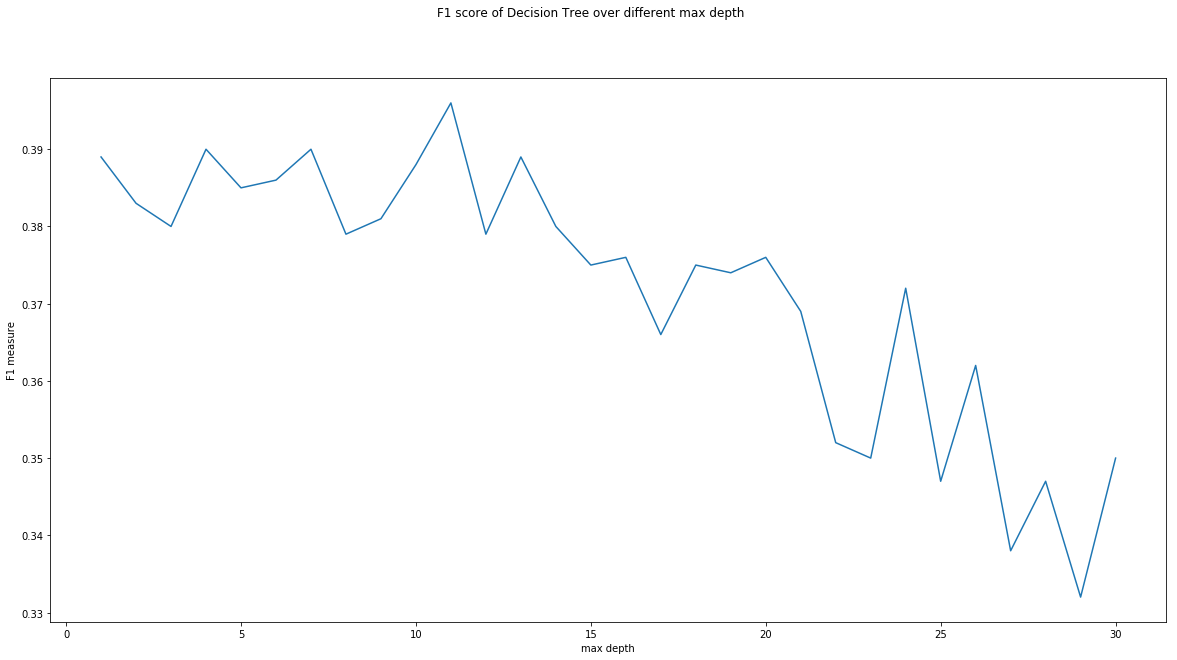

The best max depth:  11


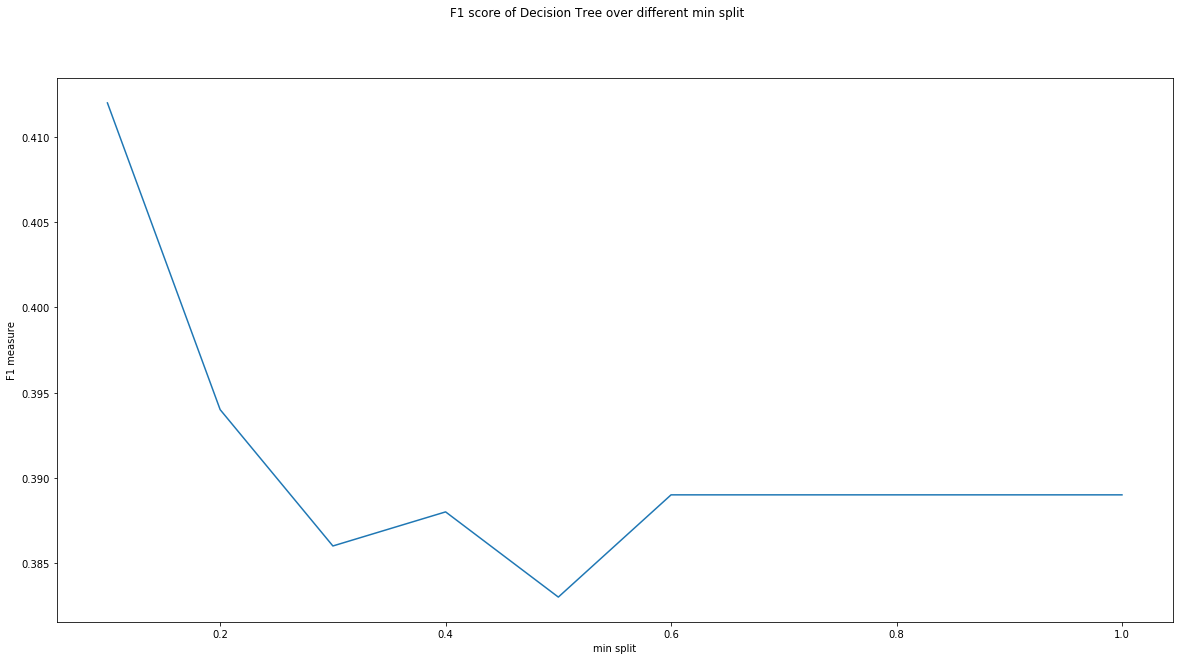

The best min split is:  0.1


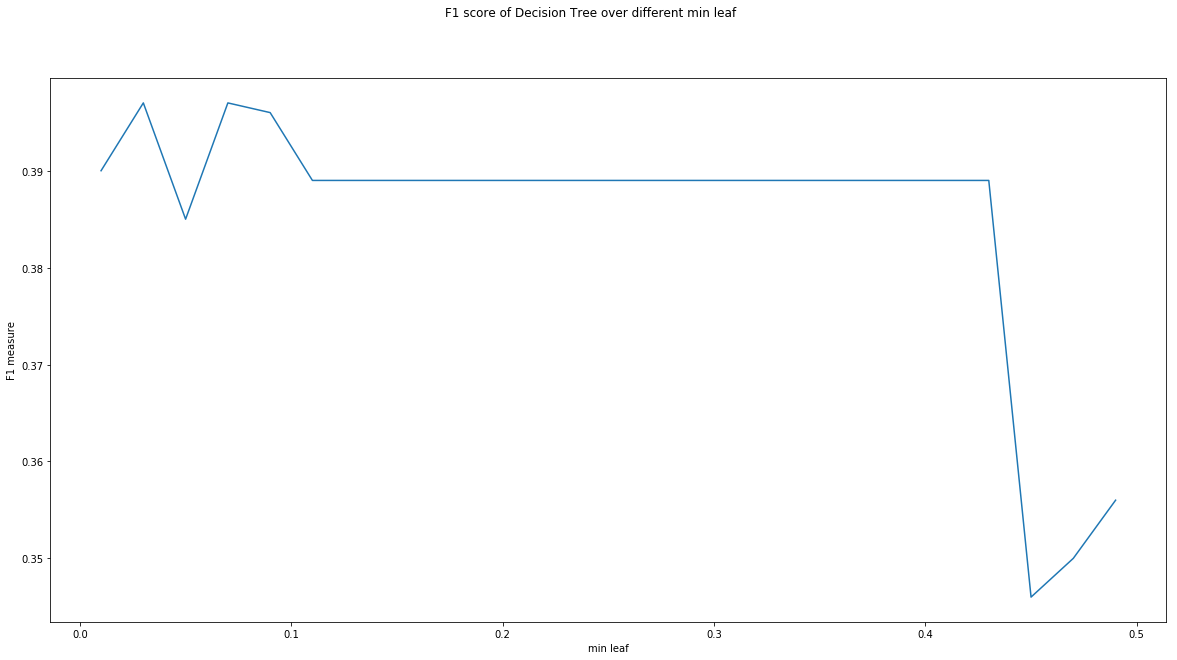

The best min leaf is:  0.03


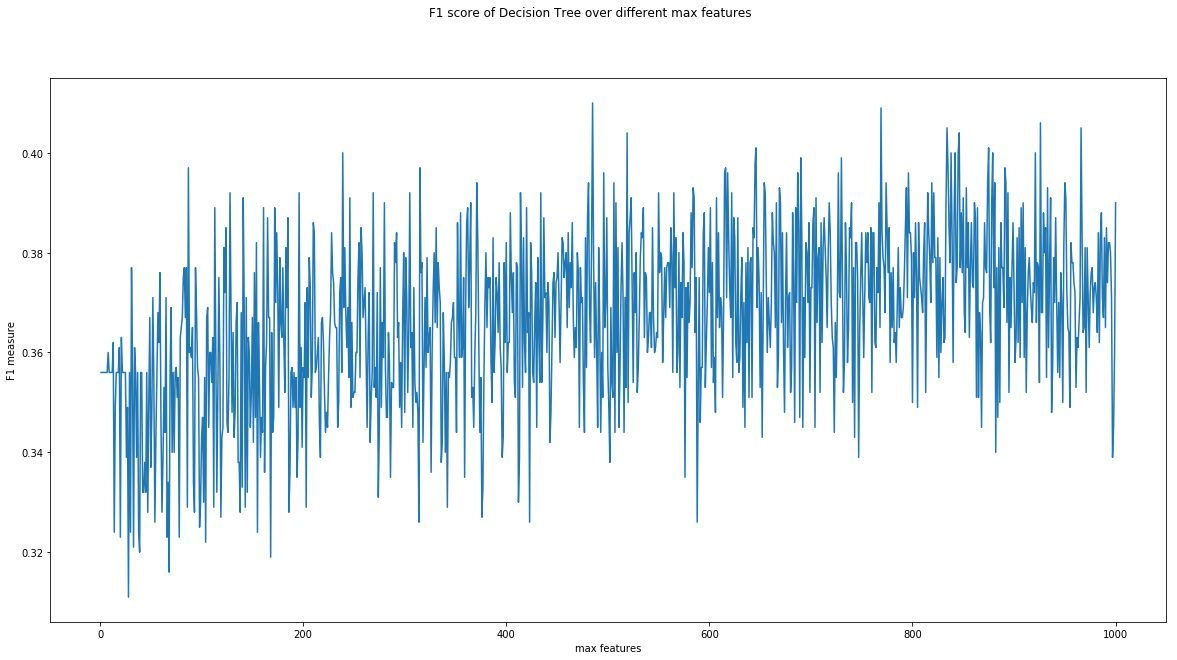

The best max features:  485


103

In [10]:
#decision tree

bbow_yelp_valid = BBoW(yelp_valid_review)
yelp_valid_classes = get_classes(yelp_valid_review)

X_yelp_valid = np.array( bbow_yelp_valid )
y_yelp_valid = np.array( yelp_valid_classes )


#tune max depth
depth_increase = 1
test_maxDepth = 1
f1_yelp_dt_list_depth = []
depth_list = []
best_depth = 0
best_f1_depth = 0
for i in range(30):
    f1_yelp_dt = f1_decision_tree(X_yelp_train,y_yelp_train,X_yelp_valid,y_yelp_valid,test_maxDepth,2,1,None)
    f1_yelp_dt_list_depth.append(f1_yelp_dt)
    depth_list.append(test_maxDepth)
    if(f1_yelp_dt > best_f1_depth):
        best_f1_depth = f1_yelp_dt
        best_depth = test_maxDepth
    test_maxDepth = int(test_maxDepth + depth_increase)

fig = plt.figure(2,figsize=(20,10))
fig.suptitle('F1 score of Decision Tree over different max depth')
plt.plot(depth_list,f1_yelp_dt_list_depth)
plt.xlabel('max depth')
plt.ylabel('F1 measure')
plt.show()
print('The best max depth: ',best_depth)

#tune min split
split_increase = 0.1
test_split = 0.1
f1_yelp_dt_list_split = []
split_list = []
best_split = 0
best_f1_split = 0
for i in range(10):
    f1_yelp_dt = f1_decision_tree(X_yelp_train,y_yelp_train,X_yelp_valid,y_yelp_valid,best_depth,test_split,1,None)
    f1_yelp_dt_list_split.append(f1_yelp_dt)
    split_list.append(test_split)
    if(f1_yelp_dt > best_f1_split):
        best_f1_split = f1_yelp_dt
        best_split = test_split
    test_split = test_split + split_increase

fig = plt.figure(3,figsize=(20,10))
fig.suptitle('F1 score of Decision Tree over different min split')
plt.plot(split_list,f1_yelp_dt_list_split)
plt.xlabel('min split')
plt.ylabel('F1 measure')
plt.show()
print('The best min split is: ', best_split)

#tune min leaf
leaf_increase = 0.02
test_leaf = 0.01
f1_yelp_dt_list_leaf = []
leaf_list = []
best_leaf = 0
best_f1_leaf = 0
for i in range(25):
    f1_yelp_dt = f1_decision_tree(X_yelp_train,y_yelp_train,X_yelp_valid,y_yelp_valid,best_depth,best_split,test_leaf,None)
    f1_yelp_dt_list_leaf.append(f1_yelp_dt)
    leaf_list.append(test_leaf)
    if(f1_yelp_dt > best_f1_leaf):
        best_f1_leaf = f1_yelp_dt
        best_leaf = test_leaf
    test_leaf = test_leaf + leaf_increase

fig = plt.figure(4,figsize=(20,10))
fig.suptitle('F1 score of Decision Tree over different min leaf')
plt.plot(leaf_list,f1_yelp_dt_list_leaf)
plt.xlabel('min leaf')
plt.ylabel('F1 measure')
plt.show()
print('The best min leaf is: ', best_leaf)

#tune max_features
feature_increase = 1
test_feature = 1
f1_yelp_dt_list_feature = []
feature_list = []
best_feature = 0
best_f1_feature = 0
for i in range(1000):
    f1_yelp_dt = f1_decision_tree(X_yelp_train,y_yelp_train,X_yelp_valid,y_yelp_valid,best_depth,best_split,best_leaf,test_feature)
    f1_yelp_dt_list_feature.append(f1_yelp_dt)
    feature_list.append(test_feature)
    if(f1_yelp_dt > best_f1_feature):
        best_f1_feature = f1_yelp_dt
        best_feature = test_feature
    test_feature = test_feature + feature_increase

fig = plt.figure(5,figsize=(20,10))
fig.suptitle('F1 score of Decision Tree over different max features')
plt.plot(feature_list,f1_yelp_dt_list_feature)
plt.xlabel('max features')
plt.ylabel('F1 measure')
plt.show()
print('The best max features: ', best_feature)


f = open('Assignment3_260540022_2_2_decision_tree_hyperparameter.txt','w')

f.write('The best max depth: ' + str(best_depth) + '\t' + '(range :' + '1 to 30)' + '\n'
+'The best min split is: ' +  str(best_split) + '\t' +'(range :' + '0 to 1)' + '\n'
+'The best min leaf is: ' + str(best_leaf) + '\t' +'(range :' + '0 to 0.5)' +'\n'
+'The best max features: ' + str(best_feature) + '\t' +'(range :' + '1 to 1000)')



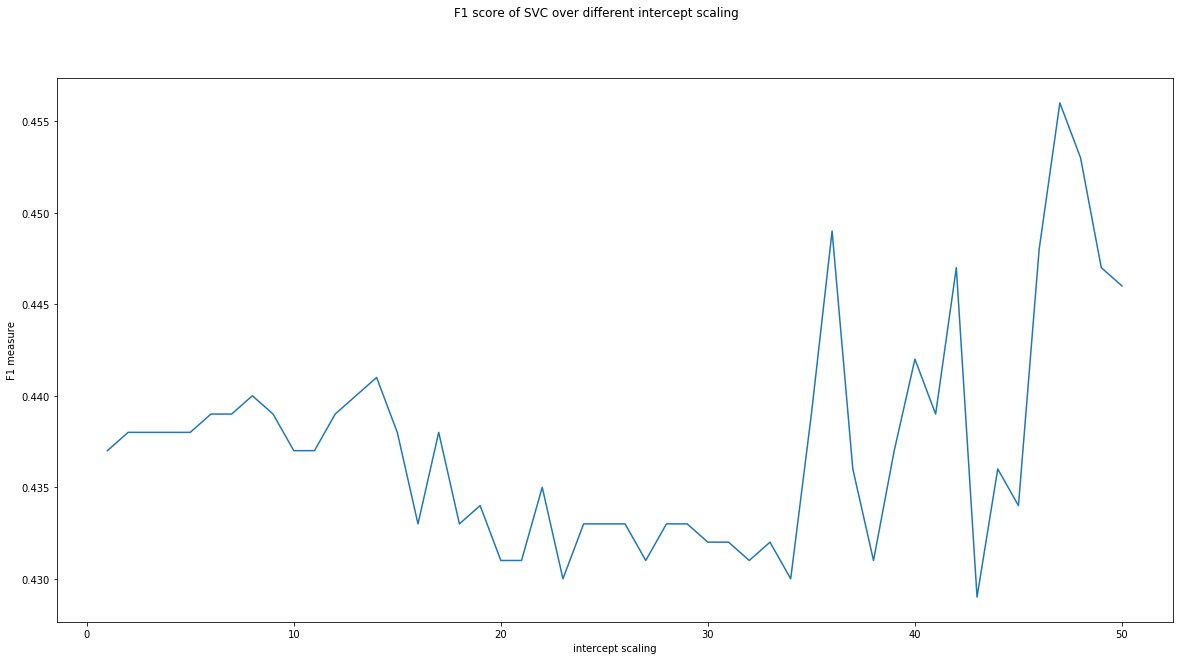

The best intercept scaling:  47


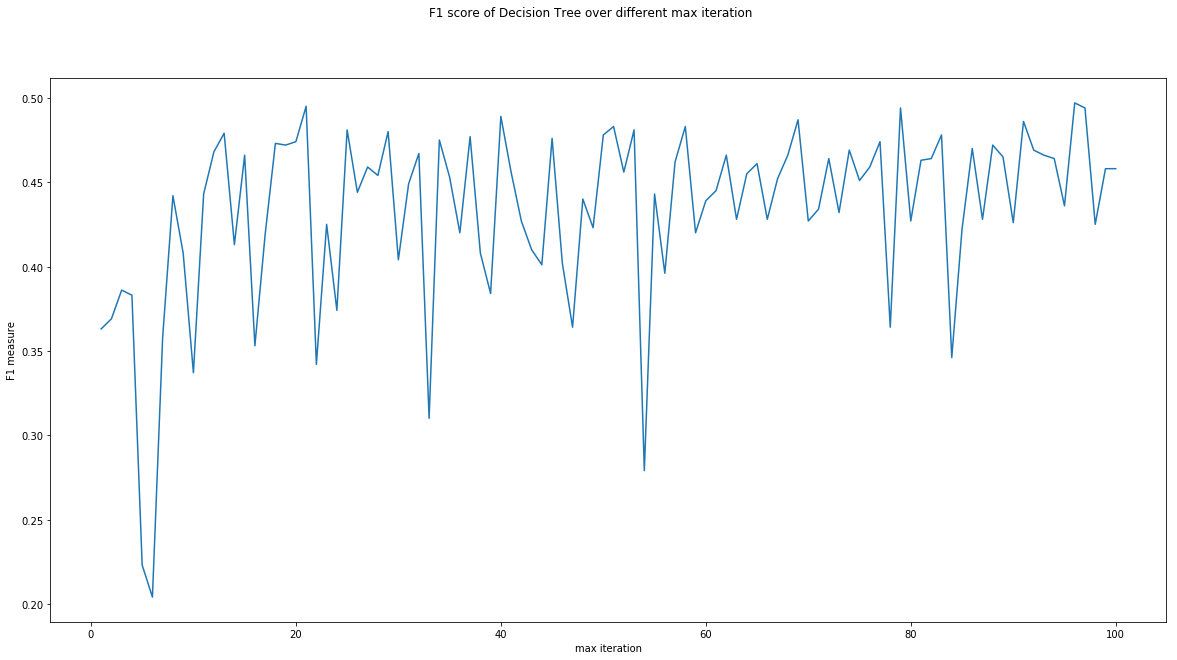

The best max iteration:  96


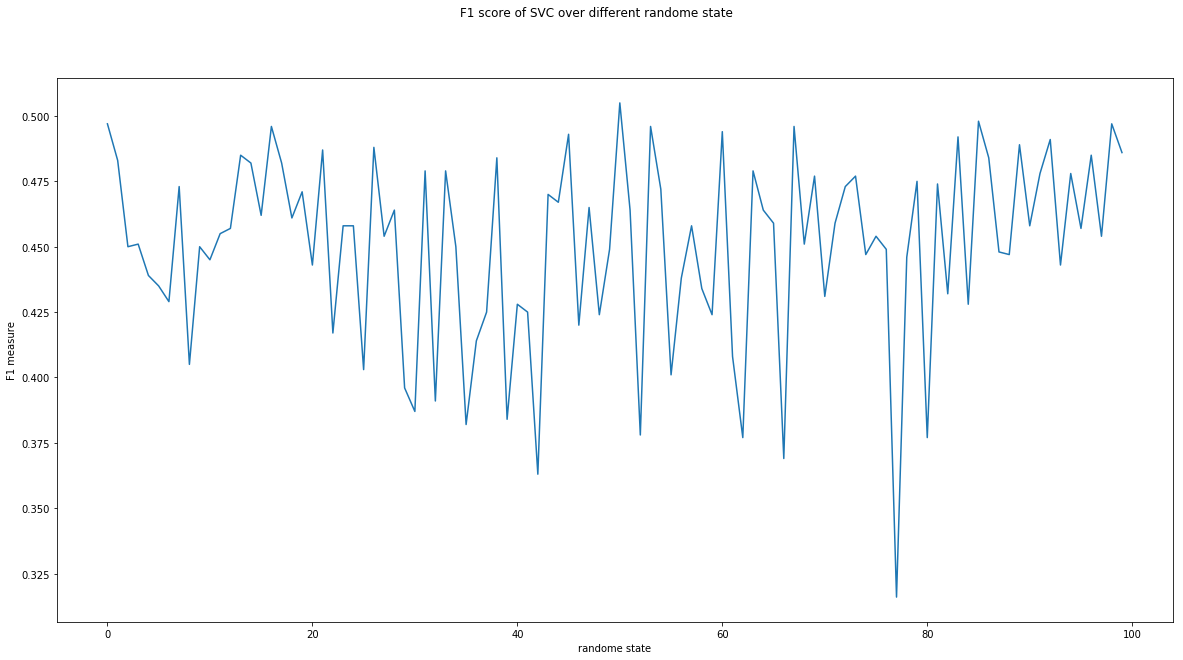

The best max randome state:  50


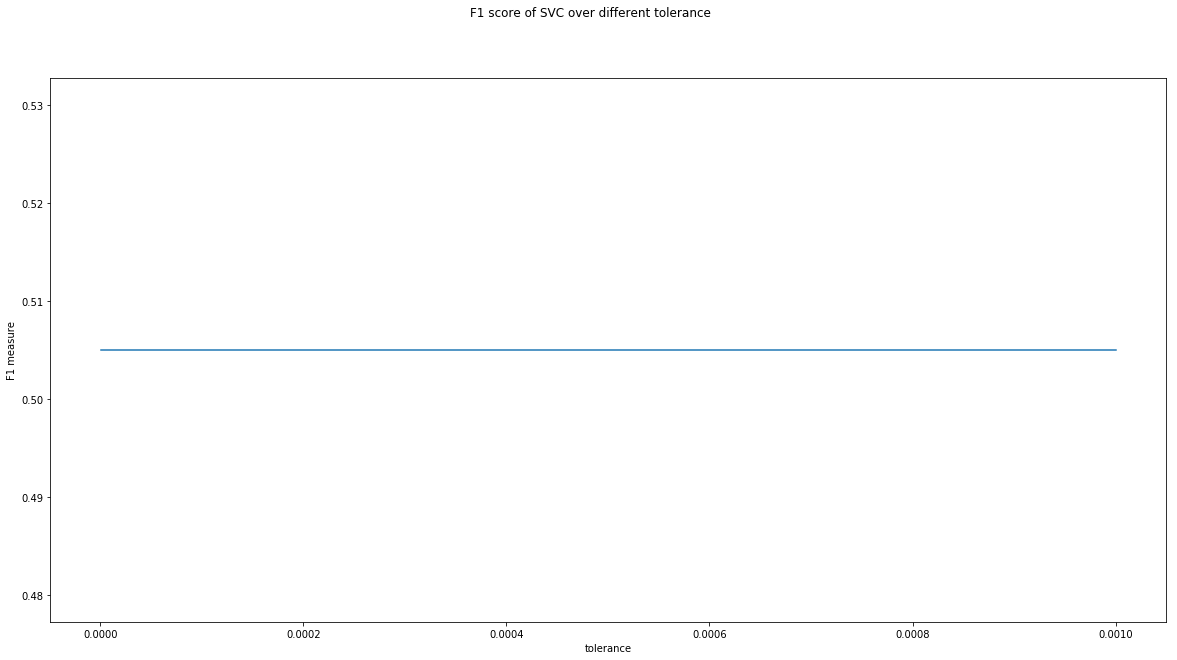

The best max tolerance:  1e-06


In [11]:
#linear SVC
f1_yelp_svc = f1_svc(X_yelp_train,y_yelp_train,X_yelp_test,y_yelp_test,1,1000,0,1e-05)
#tune intercept scaling
is_increase = 1
test_is = 1
f1_yelp_svc_list_is = []
is_list = []
best_is = 0
best_f1_is = 0
for i in range(50):
    f1_yelp_svc = f1_svc(X_yelp_train,y_yelp_train,X_yelp_valid,y_yelp_valid,test_is,1000,0,1e-05)
    f1_yelp_svc_list_is.append(f1_yelp_svc)
    is_list.append(test_is)
    if(f1_yelp_svc > best_f1_is):
        best_f1_is = f1_yelp_svc
        best_is = test_is
    test_is = test_is + is_increase

fig = plt.figure(6,figsize=(20,10))
fig.suptitle('F1 score of SVC over different intercept scaling')
plt.plot(is_list,f1_yelp_svc_list_is)
plt.xlabel('intercept scaling')
plt.ylabel('F1 measure')
plt.show()
print('The best intercept scaling: ',best_is)

#tune max iteration
iteration_increase = 1
test_iteration = 1
f1_yelp_svc_list_iteration = []
iteration_list = []
best_iteration = 0
best_f1_iteration = 0
for i in range(100):
    f1_yelp_svc = f1_svc(X_yelp_train,y_yelp_train,X_yelp_valid,y_yelp_valid,best_is,test_iteration,0,1e-05)
    f1_yelp_svc_list_iteration.append(f1_yelp_svc)
    iteration_list.append(test_iteration)
    if(f1_yelp_svc > best_f1_iteration):
        best_f1_iteration = f1_yelp_svc
        best_iteration = test_iteration
    test_iteration = test_iteration + iteration_increase

fig = plt.figure(7,figsize=(20,10))
fig.suptitle('F1 score of Decision Tree over different max iteration')
plt.plot(iteration_list,f1_yelp_svc_list_iteration)
plt.xlabel('max iteration')
plt.ylabel('F1 measure')
plt.show()
print('The best max iteration: ',best_iteration)

#tune randome state
state_increase = 1
test_state = 0
f1_yelp_svc_list_state = []
state_list = []
best_state = 0
best_f1_state = 0
for i in range(100):
    f1_yelp_svc = f1_svc(X_yelp_train,y_yelp_train,X_yelp_valid,y_yelp_valid,best_is,best_iteration,test_state,1e-05)
    f1_yelp_svc_list_state.append(f1_yelp_svc)
    state_list.append(test_state)
    if(f1_yelp_svc > best_f1_state):
        best_f1_state = f1_yelp_svc
        best_state = test_state
    test_state = test_state + state_increase

fig = plt.figure(8,figsize=(20,10))
fig.suptitle('F1 score of SVC over different randome state')
plt.plot(state_list,f1_yelp_svc_list_state)
plt.xlabel('randome state')
plt.ylabel('F1 measure')
plt.show()
print('The best max randome state: ',best_state)

#tune tolerance
tol_increase = 1e-6
test_tol = 1e-6
f1_yelp_svc_list_tol = []
tol_list = []
best_tol = 0
best_f1_tol = 0
for i in range(1000):
    f1_yelp_svc = f1_svc(X_yelp_train,y_yelp_train,X_yelp_valid,y_yelp_valid,best_is,best_iteration,best_state,test_tol)
    f1_yelp_svc_list_tol.append(f1_yelp_svc)
    tol_list.append(test_tol)
    if(f1_yelp_svc > best_f1_tol):
        best_f1_tol = f1_yelp_svc
        best_tol = test_tol
    test_tol = test_tol + tol_increase

fig = plt.figure(9,figsize=(20,10))
fig.suptitle('F1 score of SVC over different tolerance')
plt.plot(tol_list,f1_yelp_svc_list_tol)
plt.xlabel('tolerance')
plt.ylabel('F1 measure')
plt.show()
print('The best max tolerance: ',best_tol)

f = open('Assignment3_260540022_2_c_svm_hyperparameter.txt','w')

f.write('The intercept scaling: ' + str(best_is) + '\t' + '(range :' + '1 to 50)' + '\n'
+'The best max iteration is: ' +  str(best_iteration) + '\t' +'(range :' + '1 to 100)' + '\n'
+'The best randome state is: ' + str(best_state) + '\t' +'(range :' + '1 to 100)' +'\n'
+'The best tolerance is: ' + str(best_tol) + '\t' +'(range :' + '1e-6 to 1e-3)')


In [22]:
#c
#train set
#f1 for train data with tunned naive bayes 
f1_yelp_nb_tunned_train = f1_NB(X_yelp_train,y_yelp_train,X_yelp_train,y_yelp_train,best_alpha)

#f1 for train data with tunned decision tree
f1_yelp_dt_tunned_train = f1_decision_tree(X_yelp_train,y_yelp_train,X_yelp_train,y_yelp_train,best_depth,best_split,best_leaf,best_feature)

#f1 for train data with tunned svm
f1_yelp_svc_tunned_train = f1_svc(X_yelp_train,y_yelp_train,X_yelp_train,y_yelp_train,best_is,best_iteration,best_state,best_tol)


#valid set
#f1 for train data with tunned naive bayes 
f1_yelp_nb_tunned_valid = f1_NB(X_yelp_train,y_yelp_train,X_yelp_valid,y_yelp_valid,best_alpha)

#f1 for train data with tunned decision tree
f1_yelp_dt_tunned_valid = f1_decision_tree(X_yelp_train,y_yelp_train,X_yelp_valid,y_yelp_valid,best_depth,best_split,best_leaf,best_feature)

#f1 for train data with tunned svm
f1_yelp_svc_tunned_valid = f1_svc(X_yelp_train,y_yelp_train,X_yelp_valid,y_yelp_valid,best_is,best_iteration,best_state,best_tol)


#test set
#f1 for test data with tunned naive bayes
f1_yelp_nb_tunned_test = f1_NB(X_yelp_train,y_yelp_train,X_yelp_test,y_yelp_test,best_alpha)

#f1 for test data with tunned decision tree
f1_yelp_dt_tunned_test = f1_decision_tree(X_yelp_train,y_yelp_train,X_yelp_test,y_yelp_test,best_depth,best_split,best_leaf,best_feature)

#f1 for test data with tunned svm
f1_yelp_svc_tunned_test = f1_svc(X_yelp_train,y_yelp_train,X_yelp_test,y_yelp_test,best_is,best_iteration,best_state,best_tol)


print('yelp nb train: ',f1_yelp_nb_tunned_train)
print('yelp dt train: ',f1_yelp_dt_tunned_train)
print('yelp svm train: ',f1_yelp_svc_tunned_train)

print('yelp nb valid: ',f1_yelp_nb_tunned_valid)
print('yelp dt valid: ',f1_yelp_dt_tunned_valid)
print('yelp svm valid: ',f1_yelp_svc_tunned_valid)

print('yelp nb test: ',f1_yelp_nb_tunned_test)
print('yelp dt test: ',f1_yelp_dt_tunned_test)
print('yelp svm test: ',f1_yelp_svc_tunned_test)

yelp nb train:  0.7305714285714285
yelp dt train:  0.39285714285714285
yelp svm train:  0.898857142857143
yelp nb valid:  0.424
yelp dt valid:  0.373
yelp svm valid:  0.505
yelp nb test:  0.444
yelp dt test:  0.3935
yelp svm test:  0.501


In [19]:
#Q3 Frequency bag
from sklearn.naive_bayes import GaussianNB

#(a)

fbow_yelp_train = FBoW(yelp_train_review)
fbow_yelp_valid = FBoW(yelp_valid_review)
fbow_yelp_test = FBoW(yelp_test_review)

yelp_valid_classes = get_classes(yelp_valid_review)

X_yelp_train_fre = np.array(fbow_yelp_train)
y_yelp_train_fre = np.array( yelp_train_classes )

X_yelp_valid_fre = np.array( fbow_yelp_valid )
y_yelp_valid_fre = np.array( yelp_valid_classes )

X_yelp_test_fre = np.array( fbow_yelp_test )
y_yelp_test_fre = np.array( yelp_test_classes )

#Naive Bayes
f1_yelp_nb_train_freq = f1_Gaussian_NB(X_yelp_train_fre,y_yelp_train_fre,X_yelp_test_fre,y_yelp_test_fre)
print('Naive Bayes test performance: ',f1_yelp_nb_train_freq)

Naive Bayes test performance:  0.32


The best max depth:  7


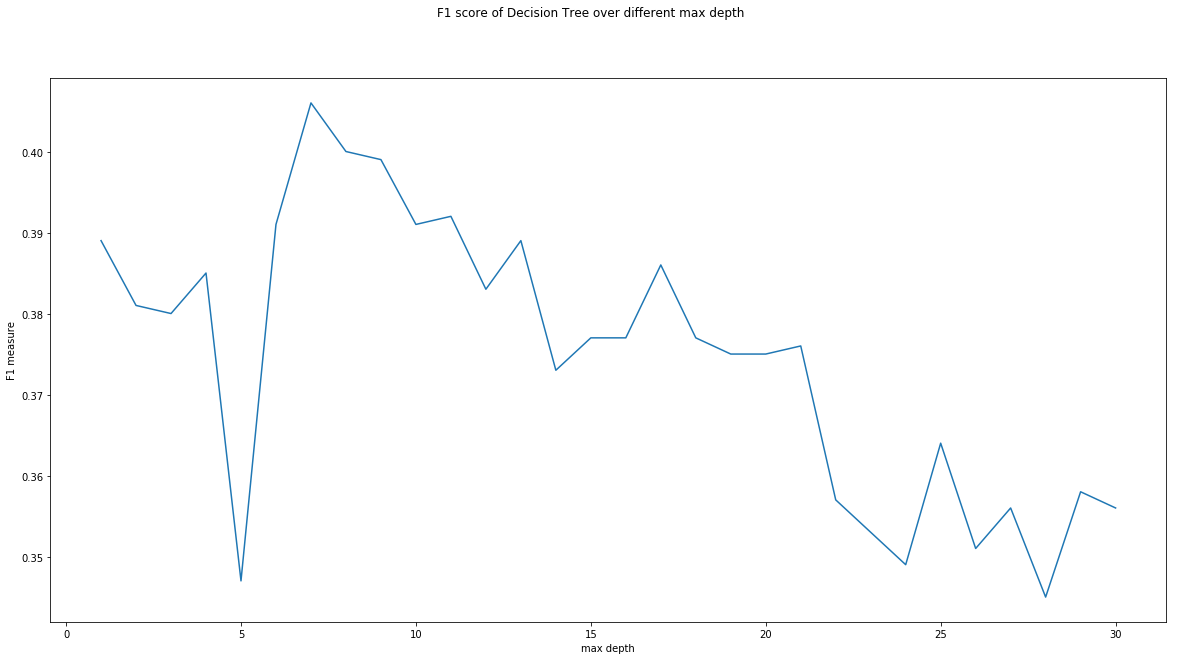

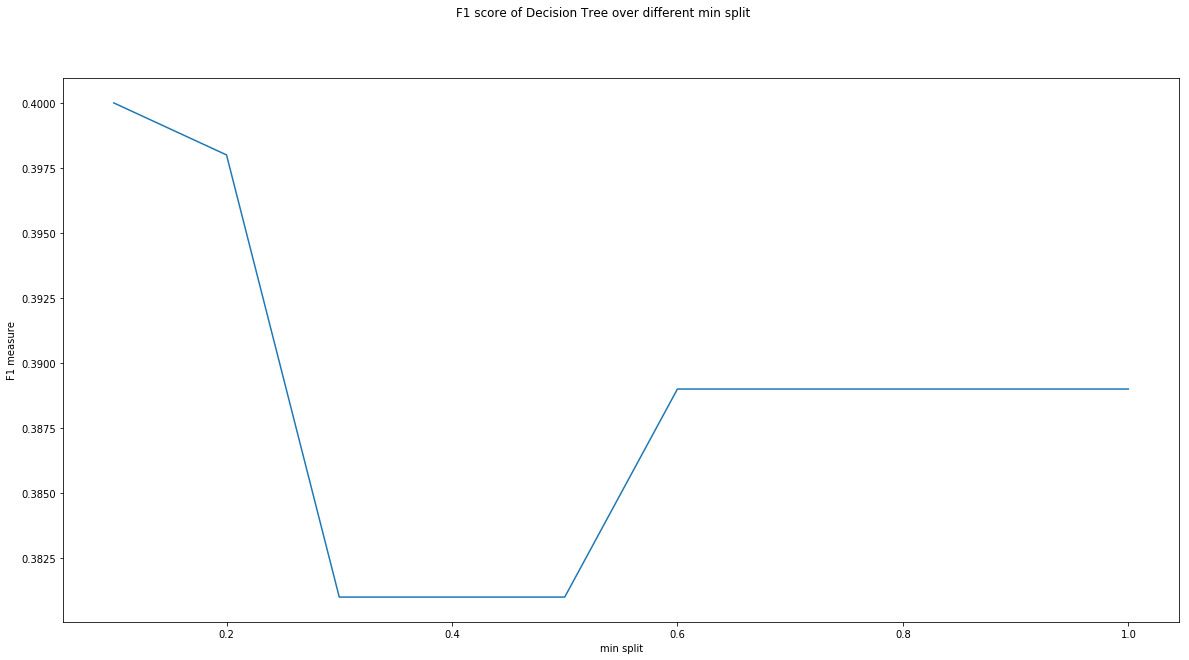

The best min split is:  0.1


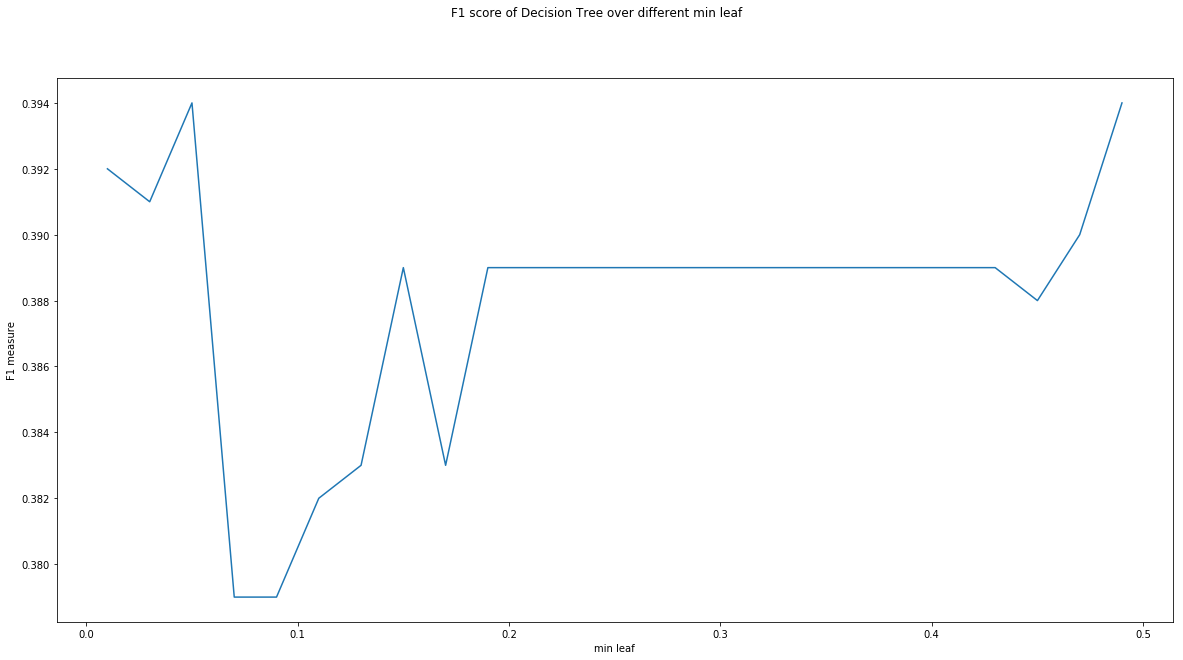

The best min leaf is:  0.05


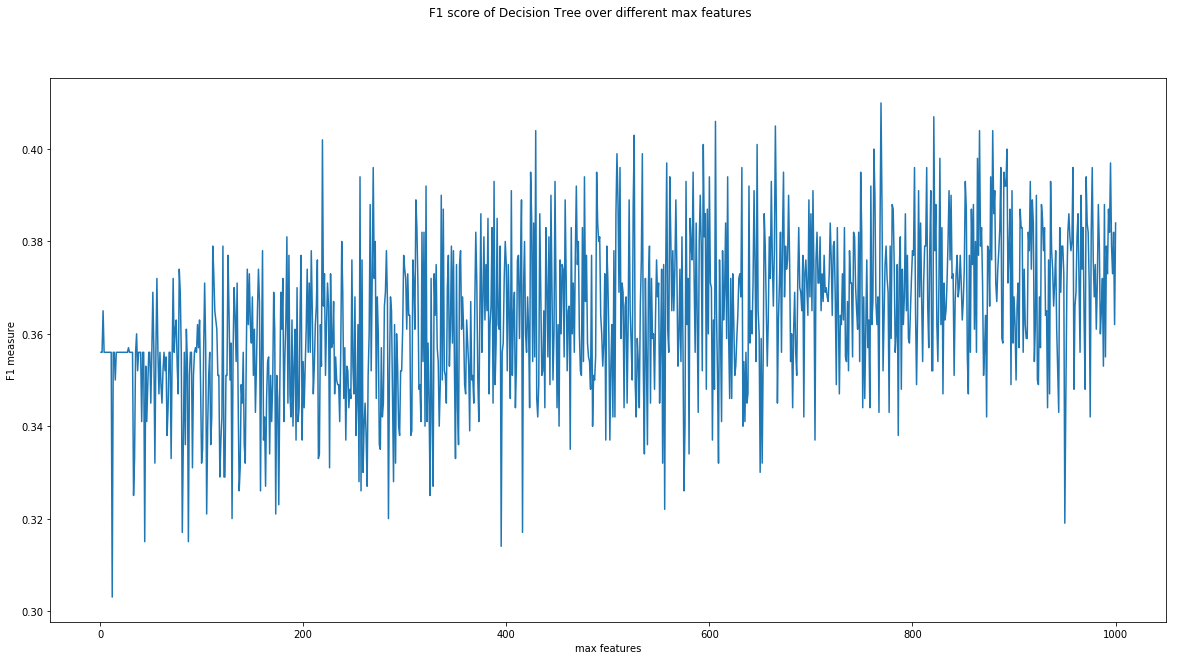

The best max features:  769


172

In [21]:
#decision tree
#tune max depth
depth_increase = 1
test_maxDepth = 1
f1_yelp_dt_list_depth = []
depth_list = []
best_depth = 0
best_f1_depth = 0
for i in range(30):
    f1_yelp_dt = f1_decision_tree(X_yelp_train_fre,y_yelp_train_fre,X_yelp_valid_fre,y_yelp_valid_fre,test_maxDepth,2,1,None)
    f1_yelp_dt_list_depth.append(f1_yelp_dt)
    depth_list.append(test_maxDepth)
    if(f1_yelp_dt > best_f1_depth):
        best_f1_depth = f1_yelp_dt
        best_depth = test_maxDepth
    test_maxDepth = int(test_maxDepth + depth_increase)

fig = plt.figure(10,figsize=(20,10))
fig.suptitle('F1 score of Decision Tree over different max depth')
plt.plot(depth_list,f1_yelp_dt_list_depth)
plt.xlabel('max depth')
plt.ylabel('F1 measure')

print('The best max depth: ',best_depth)



#tune min split
split_increase = 0.1
test_split = 0.1
f1_yelp_dt_list_split = []
split_list = []
best_split = 0
best_f1_split = 0
for i in range(10):
    f1_yelp_dt = f1_decision_tree(X_yelp_train_fre,y_yelp_train_fre,X_yelp_valid_fre,y_yelp_valid_fre,best_depth,test_split,1,None)
    f1_yelp_dt_list_split.append(f1_yelp_dt)
    split_list.append(test_split)
    if(f1_yelp_dt > best_f1_split):
        best_f1_split = f1_yelp_dt
        best_split = test_split
    test_split = test_split + split_increase

fig = plt.figure(11,figsize=(20,10))
fig.suptitle('F1 score of Decision Tree over different min split')
plt.plot(split_list,f1_yelp_dt_list_split)
plt.xlabel('min split')
plt.ylabel('F1 measure')
plt.show()

print('The best min split is: ', best_split)

#tune min leaf
leaf_increase = 0.02
test_leaf = 0.01
f1_yelp_dt_list_leaf = []
leaf_list = []
best_leaf = 0
best_f1_leaf = 0
for i in range(25):
    f1_yelp_dt = f1_decision_tree(X_yelp_train_fre,y_yelp_train_fre,X_yelp_valid_fre,y_yelp_valid_fre,best_depth,best_split,test_leaf,None)
    f1_yelp_dt_list_leaf.append(f1_yelp_dt)
    leaf_list.append(test_leaf)
    if(f1_yelp_dt > best_f1_leaf):
        best_f1_leaf = f1_yelp_dt
        best_leaf = test_leaf
    test_leaf = test_leaf + leaf_increase

fig = plt.figure(12,figsize=(20,10))
fig.suptitle('F1 score of Decision Tree over different min leaf')
plt.plot(leaf_list,f1_yelp_dt_list_leaf)
plt.xlabel('min leaf')
plt.ylabel('F1 measure')
plt.show()

print('The best min leaf is: ', best_leaf)

#tune max_features
feature_increase = 1
test_feature = 1
f1_yelp_dt_list_feature = []
feature_list = []
best_feature = 0
best_f1_feature = 0
for i in range(1000):
    f1_yelp_dt = f1_decision_tree(X_yelp_train_fre,y_yelp_train_fre,X_yelp_valid_fre,y_yelp_valid_fre,best_depth,best_split,best_leaf,test_feature)
    f1_yelp_dt_list_feature.append(f1_yelp_dt)
    feature_list.append(test_feature)
    if(f1_yelp_dt > best_f1_feature):
        best_f1_feature = f1_yelp_dt
        best_feature = test_feature
    test_feature = test_feature + feature_increase

fig = plt.figure(13,figsize=(20,10))
fig.suptitle('F1 score of Decision Tree over different max features')
plt.plot(feature_list,f1_yelp_dt_list_feature)
plt.xlabel('max features')
plt.ylabel('F1 measure')
plt.show()

print('The best max features: ', best_feature)


f = open('Assignment3_260540022_3_b_decision_tree_hyperparameter.txt','w')

f.write('The best max depth: ' + str(best_depth) + '\t' + '(range :' + '1 to 30)' + '\n'
+'The best min split is: ' +  str(best_split) + '\t' +'(range :' + '0 to 1)' + '\n'
+'The best min leaf is: ' + str(best_leaf) + '\t' +'(range :' + '0 to 0.5)' +'\n'
+'The best max features: ' + str(best_feature) + '\t' +'(range :' + '1 to 1000)')



The best intercept scaling:  31
The best max iteration:  33
The best max randome state:  0
The best max tolerance:  1e-06


188

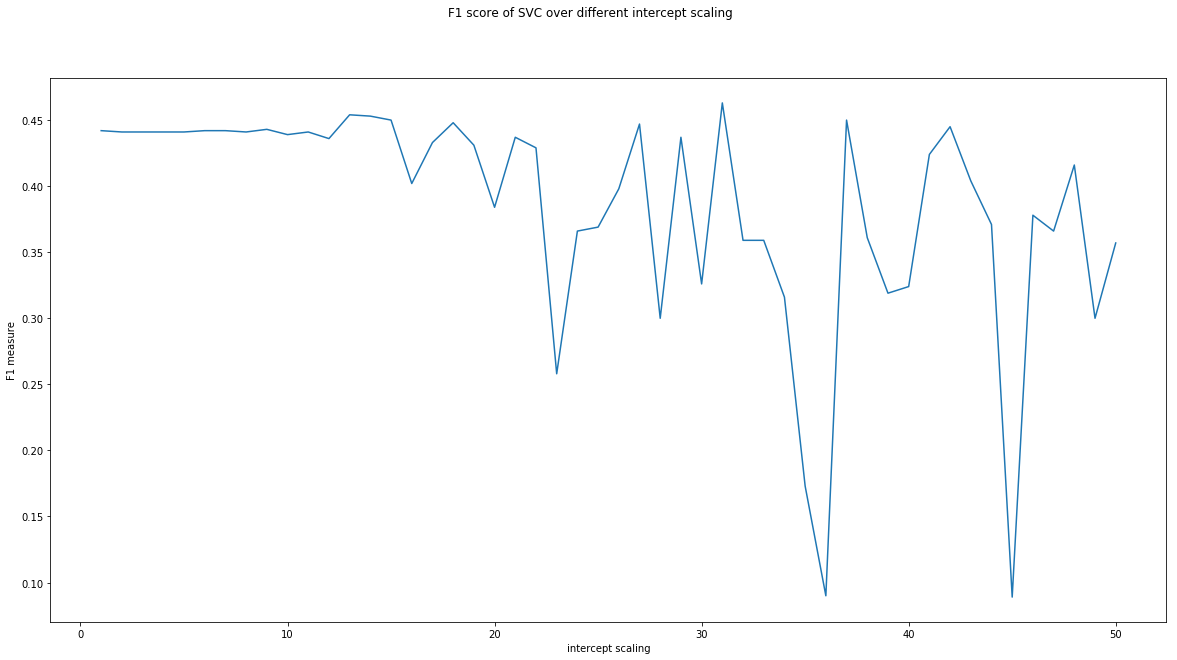

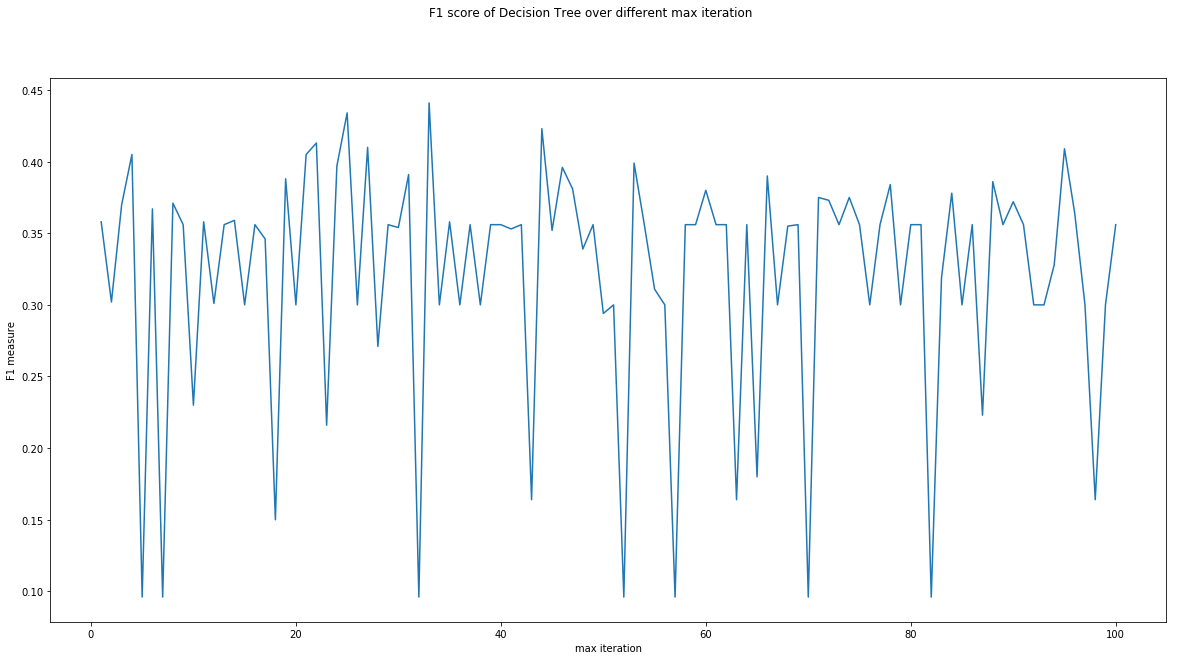

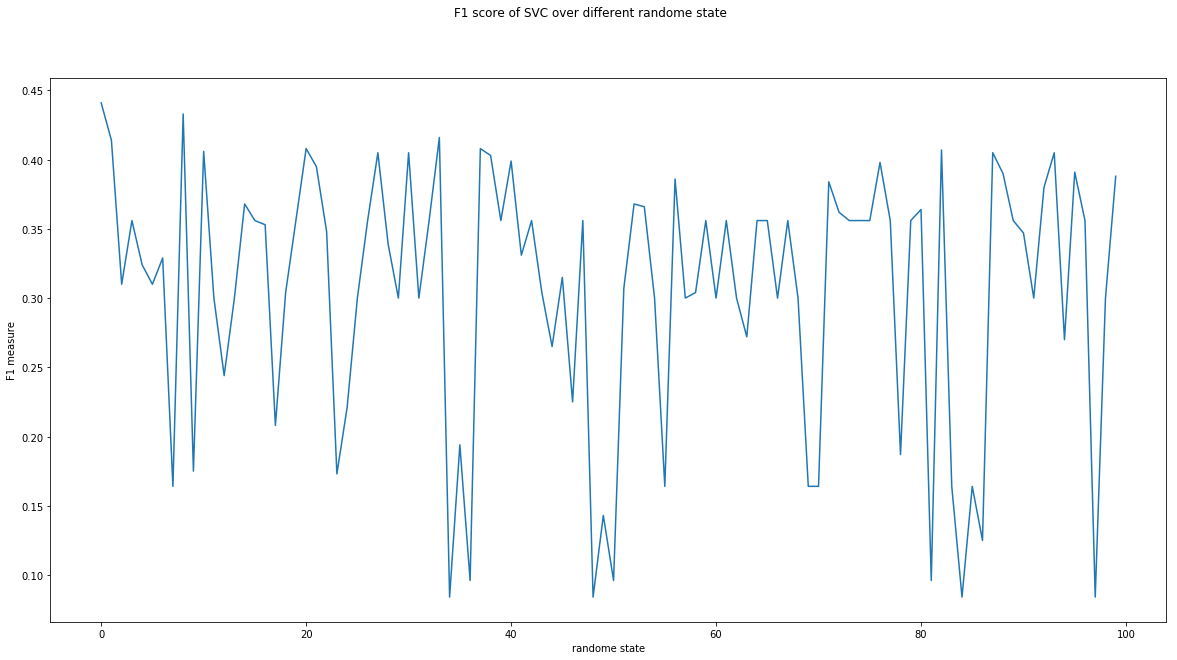

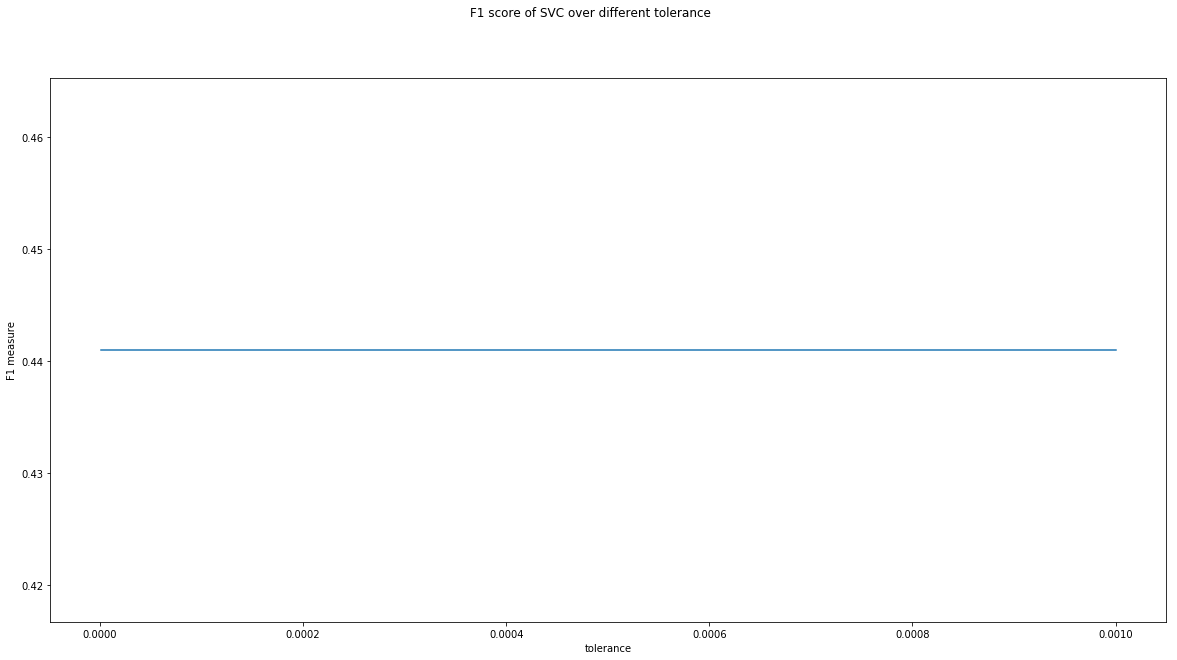

In [28]:
#linear SVC
#tune intercept scaling
is_increase = 1
test_is = 1
f1_yelp_svc_list_is = []
is_list = []
best_is = 0
best_f1_is = 0
for i in range(50):
    f1_yelp_svc = f1_svc(X_yelp_train_fre,y_yelp_train_fre,X_yelp_valid_fre,y_yelp_valid_fre,test_is,1000,0,1e-05)
    f1_yelp_svc_list_is.append(f1_yelp_svc)
    is_list.append(test_is)
    if(f1_yelp_svc > best_f1_is):
        best_f1_is = f1_yelp_svc
        best_is = test_is
    test_is = test_is + is_increase

fig = plt.figure(6,figsize=(20,10))
fig.suptitle('F1 score of SVC over different intercept scaling')
plt.plot(is_list,f1_yelp_svc_list_is)
plt.xlabel('intercept scaling')
plt.ylabel('F1 measure')

print('The best intercept scaling: ',best_is)

#tune max iteration
iteration_increase = 1
test_iteration = 1
f1_yelp_svc_list_iteration = []
iteration_list = []
best_iteration = 0
best_f1_iteration = 0
for i in range(100):
    f1_yelp_svc = f1_svc(X_yelp_train_fre,y_yelp_train_fre,X_yelp_valid_fre,y_yelp_valid_fre,best_is,test_iteration,0,1e-05)
    f1_yelp_svc_list_iteration.append(f1_yelp_svc)
    iteration_list.append(test_iteration)
    if(f1_yelp_svc > best_f1_iteration):
        best_f1_iteration = f1_yelp_svc
        best_iteration = test_iteration
    test_iteration = test_iteration + iteration_increase

fig = plt.figure(7,figsize=(20,10))
fig.suptitle('F1 score of Decision Tree over different max iteration')
plt.plot(iteration_list,f1_yelp_svc_list_iteration)
plt.xlabel('max iteration')
plt.ylabel('F1 measure')

print('The best max iteration: ',best_iteration)

#tune randome state
state_increase = 1
test_state = 0
f1_yelp_svc_list_state = []
state_list = []
best_state = 0
best_f1_state = 0
for i in range(100):
    f1_yelp_svc = f1_svc(X_yelp_train_fre,y_yelp_train_fre,X_yelp_valid_fre,y_yelp_valid_fre,best_is,best_iteration,test_state,1e-05)
    f1_yelp_svc_list_state.append(f1_yelp_svc)
    state_list.append(test_state)
    if(f1_yelp_svc > best_f1_state):
        best_f1_state = f1_yelp_svc
        best_state = test_state
    test_state = test_state + state_increase

fig = plt.figure(8,figsize=(20,10))
fig.suptitle('F1 score of SVC over different randome state')
plt.plot(state_list,f1_yelp_svc_list_state)
plt.xlabel('randome state')
plt.ylabel('F1 measure')

print('The best max randome state: ',best_state)

#tune tolerance
tol_increase = 1e-6
test_tol = 1e-6
f1_yelp_svc_list_tol = []
tol_list = []
best_tol = 0
best_f1_tol = 0
for i in range(1000):
    f1_yelp_svc = f1_svc(X_yelp_train_fre,y_yelp_train_fre,X_yelp_valid_fre,y_yelp_valid_fre,best_is,best_iteration,best_state,test_tol)
    f1_yelp_svc_list_tol.append(f1_yelp_svc)
    tol_list.append(test_tol)
    if(f1_yelp_svc > best_f1_tol):
        best_f1_tol = f1_yelp_svc
        best_tol = test_tol
    test_tol = test_tol + tol_increase

fig = plt.figure(9,figsize=(20,10))
fig.suptitle('F1 score of SVC over different tolerance')
plt.plot(tol_list,f1_yelp_svc_list_tol)
plt.xlabel('tolerance')
plt.ylabel('F1 measure')

print('The best max tolerance: ',best_tol)

f = open('Assignment3_260540022_3_b_svm_hyperparameter.txt','w')

f.write('The intercept scaling: ' + str(best_is) + '\t' + '(range :' + '1 to 50)' + '\n'
+'The best max iteration is: ' +  str(best_iteration) + '\t' +'(range :' + '1 to 100)' + '\n'
+'The best randome state is: ' + str(best_state) + '\t' +'(range :' + '1 to 100)' +'\n'
+'The best tolerance is: ' + str(best_tol) + '\t' +'(range :' + '1e-6 to 1e-3)')


In [30]:
#train set
#f1 for train data with tunned naive bayes 
f1_yelp_nb_tunned_train_f = f1_Gaussian_NB(X_yelp_train_fre,y_yelp_train_fre,X_yelp_train_fre,y_yelp_train_fre)

#f1 for train data with tunned decision tree
f1_yelp_dt_tunned_train_f = f1_decision_tree(X_yelp_train_fre,y_yelp_train_fre,X_yelp_train_fre,y_yelp_train_fre,best_depth,best_split,best_leaf,best_feature)

#f1 for train data with tunned svm
f1_yelp_svc_tunned_train_f = f1_yelp_svc = f1_svc(X_yelp_train_fre,y_yelp_train_fre,X_yelp_train_fre,y_yelp_train_fre,best_is,best_iteration,best_state,best_tol)


#valid set
#f1 for train data with tunned naive bayes 
f1_yelp_nb_tunned_valid_f = f1_Gaussian_NB(X_yelp_train_fre,y_yelp_train_fre,X_yelp_valid_fre,y_yelp_valid_fre)

#f1 for train data with tunned decision tree
f1_yelp_dt_tunned_valid_f = f1_decision_tree(X_yelp_train_fre,y_yelp_train_fre,X_yelp_valid_fre,y_yelp_valid_fre,best_depth,best_split,best_leaf,best_feature)

#f1 for train data with tunned svm
f1_yelp_svc_tunned_valid_f = f1_yelp_svc = f1_svc(X_yelp_train_fre,y_yelp_train_fre,X_yelp_valid_fre,y_yelp_valid_fre,best_is,best_iteration,best_state,best_tol)


#test set
#f1 for test data with tunned naive bayes
f1_yelp_nb_tunned_test_f = f1_Gaussian_NB(X_yelp_train_fre,y_yelp_train_fre,X_yelp_test_fre,y_yelp_test_fre)

#f1 for test data with tunned decision tree
f1_yelp_dt_tunned_test_f = f1_decision_tree(X_yelp_train_fre,y_yelp_train_fre,X_yelp_test_fre,y_yelp_test_fre,best_depth,best_split,best_leaf,best_feature)

#f1 for test data with tunned svm
f1_yelp_svc_tunned_test_f = f1_yelp_svc = f1_svc(X_yelp_train_fre,y_yelp_train_fre,X_yelp_test_fre,y_yelp_test_fre,best_is,best_iteration,best_state,best_tol)

f = open('Assignment3_3_c.txt','w')
f.write('Train perfformance: \n' + 'naive bayes: ' + str(f1_yelp_nb_tunned_train_f) + '\n' + 'decision tree: ' + str(f1_yelp_dt_tunned_train_f) + '\n' + 'svm: ' + str(f1_yelp_svc_tunned_train_f) + '\n' +'\n'
+ 'Valid perfformance: \n' + 'naive bayes: ' + str(f1_yelp_nb_tunned_valid_f) + '\n' + 'decision tree: ' + str(f1_yelp_dt_tunned_valid_f) + '\n' + 'svm: ' + str(f1_yelp_svc_tunned_valid_f) + '\n' + '\n'
+ 'Test perfformance: \n' + 'naive bayes: ' + str(f1_yelp_nb_tunned_test_f) + '\n' + 'decision tree: ' + str(f1_yelp_dt_tunned_test_f) + '\n' + 'svm: ' + str(f1_yelp_svc_tunned_test_f))

print('yelp nb train: ',f1_yelp_nb_tunned_train_f)
print('yelp dt train: ',f1_yelp_dt_tunned_train_f)
print('yelp svm train: ',f1_yelp_svc_tunned_train_f)

print('yelp nb valid: ',f1_yelp_nb_tunned_valid_f)
print('yelp dt valid: ',f1_yelp_dt_tunned_valid_f)
print('yelp svm valid: ',f1_yelp_svc_tunned_valid_f)

print('yelp nb test: ',f1_yelp_nb_tunned_test_f)
print('yelp dt test: ',f1_yelp_dt_tunned_test_f)
print('yelp svm test: ',f1_yelp_svc_tunned_test_f)

yelp nb train:  0.7937142857142857
yelp dt train:  0.399
yelp svm train:  0.44385714285714284
yelp nb valid:  0.301
yelp dt valid:  0.37
yelp svm valid:  0.441
yelp nb test:  0.32
yelp dt test:  0.369
yelp svm test:  0.425


In [40]:
#Q4
#a. uniform

IMDB_train_file = open('hwk3_datasets/IMDB-train.txt')
IMDB_vocab = sort(load_text(IMDB_train_file))
write_txt(IMDB_vocab,open("IMDB-modified/IMDB-vocab.txt",'w'))

IMDB_map = hashMap(IMDB_vocab)

IMDB_train_review = modify(open('hwk3_datasets/IMDB-train.txt'),IMDB_map)
IMDB_valid_review = modify(open('hwk3_datasets/IMDB-valid.txt'),IMDB_map)
IMDB_test_review = modify(open('hwk3_datasets/IMDB-test.txt'),IMDB_map)

bbow_IMDB_train = BBoW(IMDB_train_review)
IMDB_train_classes = get_classes(IMDB_train_review)

bbow_IMDB_valid = BBoW(IMDB_valid_review)
IMDB_valid_classes = get_classes(IMDB_valid_review)

bbow_IMDB_test = BBoW(IMDB_test_review)
IMDB_test_classes = get_classes(IMDB_test_review)

X_IMDB_train = np.array( bbow_IMDB_train )
y_IMDB_train = np.array( IMDB_train_classes )

X_IMDB_valid = np.array( bbow_IMDB_valid )
y_IMDB_valid = np.array( IMDB_valid_classes )

X_IMDB_test = np.array( bbow_IMDB_test )
y_IMDB_test = np.array( IMDB_test_classes )


#a. uniform
f1_IMDB_uniform = f1_random(X_IMDB_train,y_IMDB_train,X_IMDB_test,y_IMDB_test,'uniform')
print('f1 score for IMDB uniform: ',f1_IMDB_uniform)

f = open('Assignment3_260540022_4_a.txt','w')
f.write('uniform: ' + str(f1_IMDB_uniform))



f1 score for IMDB uniform:  0.50056


16

best alpha:  0.28500000010000015


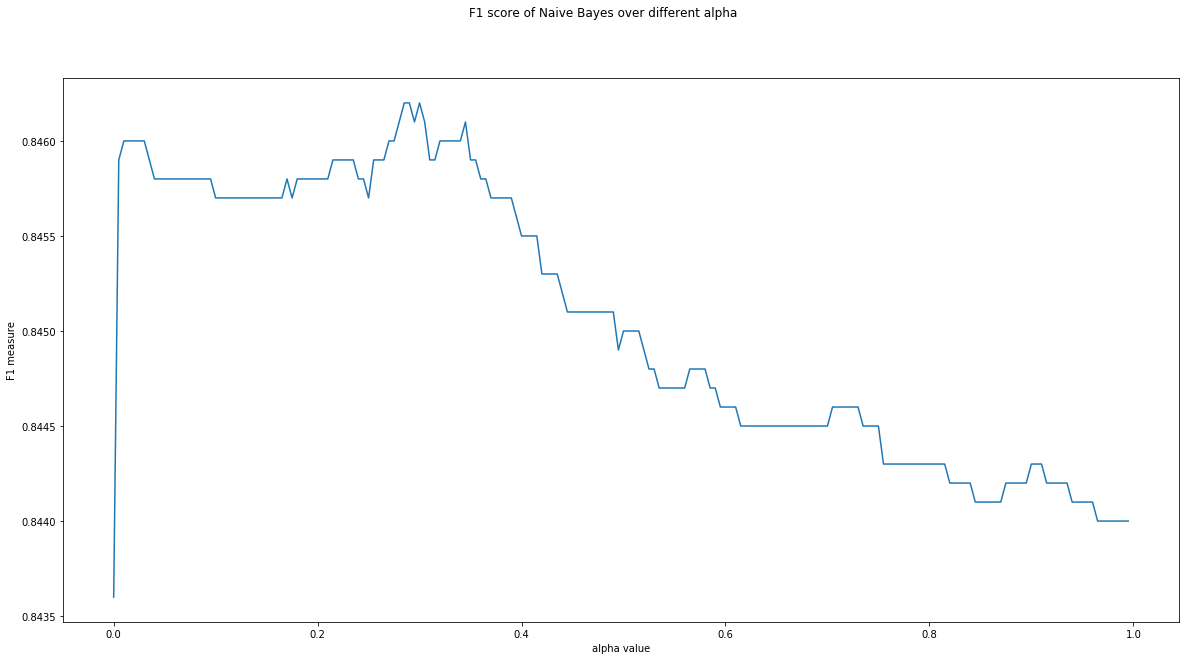

In [42]:
#b
#naive Bayes
#tune best alpha

alpha = 0.005
test_alpha = 1e-10
f1_IMDB_nb_list = []
alpha_list = []
best_alpha = 0
best_f1 = 0
for i in range(200):
    f1_IMDB_nb = f1_NB(X_IMDB_train,y_IMDB_train,X_IMDB_valid,y_IMDB_valid,test_alpha)
    f1_IMDB_nb_list.append(f1_IMDB_nb)
    alpha_list.append(test_alpha)
    if(f1_IMDB_nb > best_f1):
        best_f1 = f1_IMDB_nb
        best_alpha = test_alpha
    test_alpha = test_alpha + alpha

print('best alpha: ',best_alpha)
f = open('Assignment3_260540022_4_c_naive_bayes_hyperparameter.txt','w')
f.write('best alpha: ' + str(best_alpha) + '\t' + '(range: 1e-10 to 1)')

fig = plt.figure(18,figsize=(20,10))
fig.suptitle('F1 score of Naive Bayes over different alpha')
plt.plot(alpha_list,f1_IMDB_nb_list)
plt.xlabel('alpha value')
plt.ylabel('F1 measure')
plt.show()

The best max depth:  24


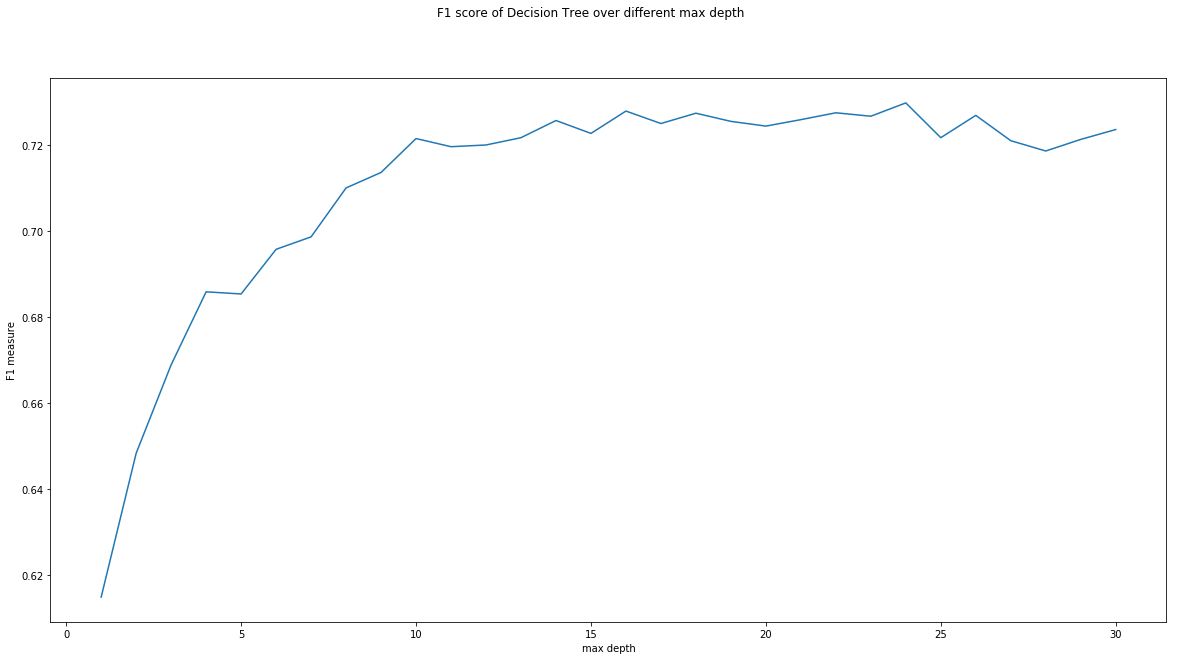

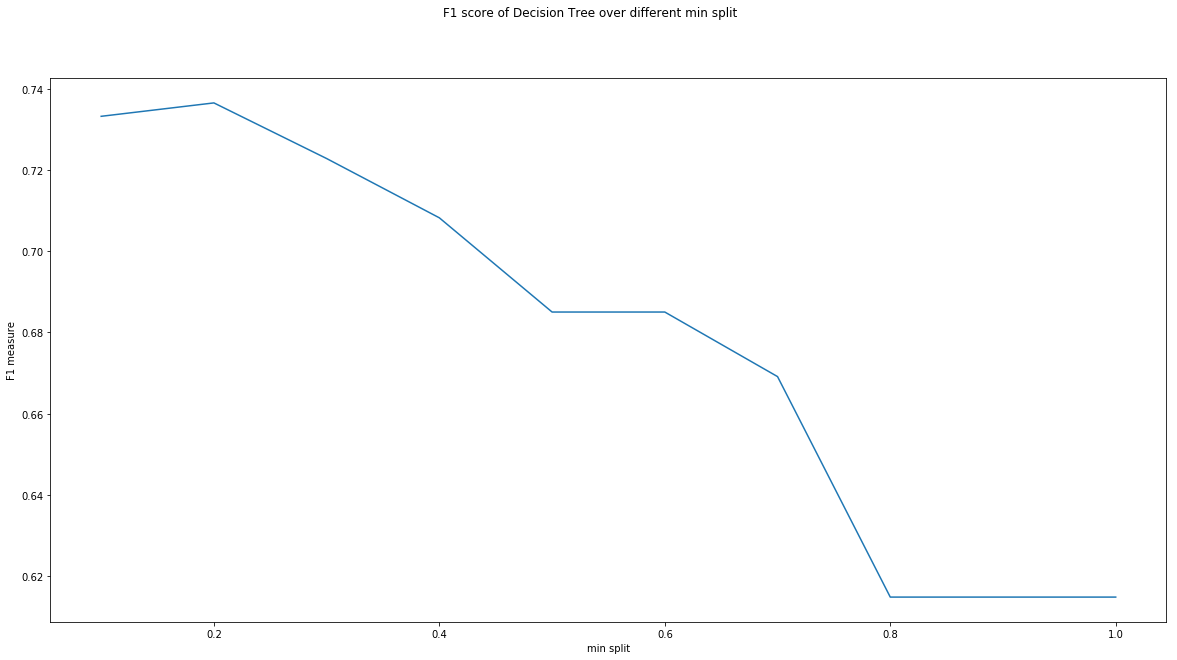

The best min split is:  0.2


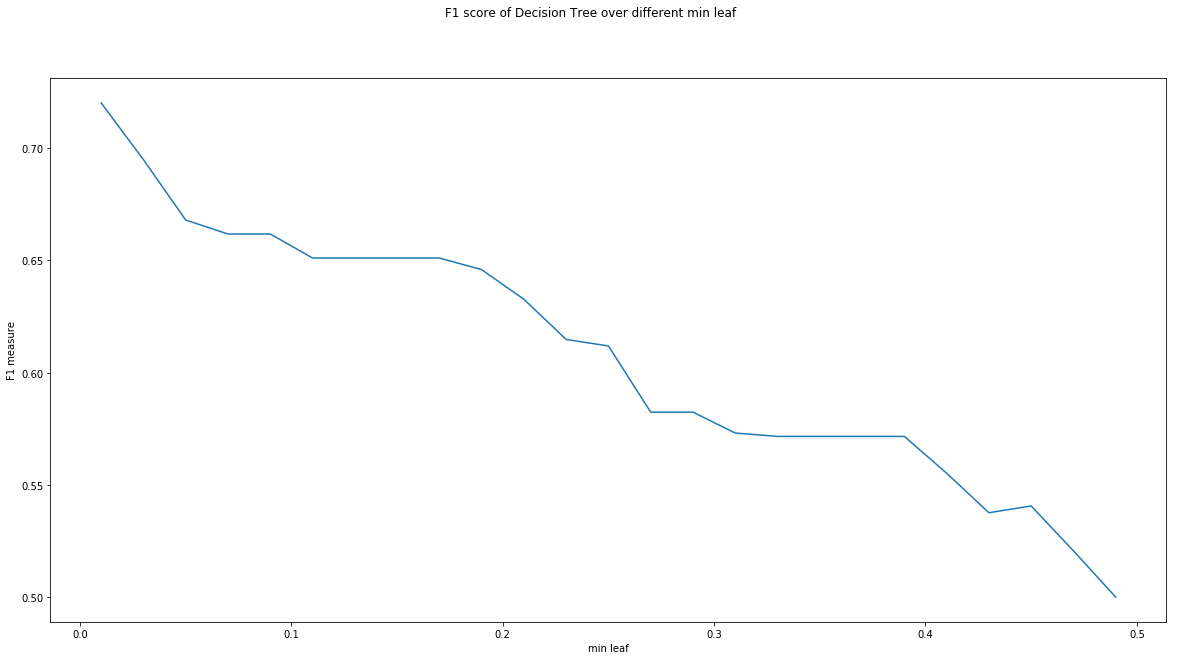

The best min leaf is:  0.01


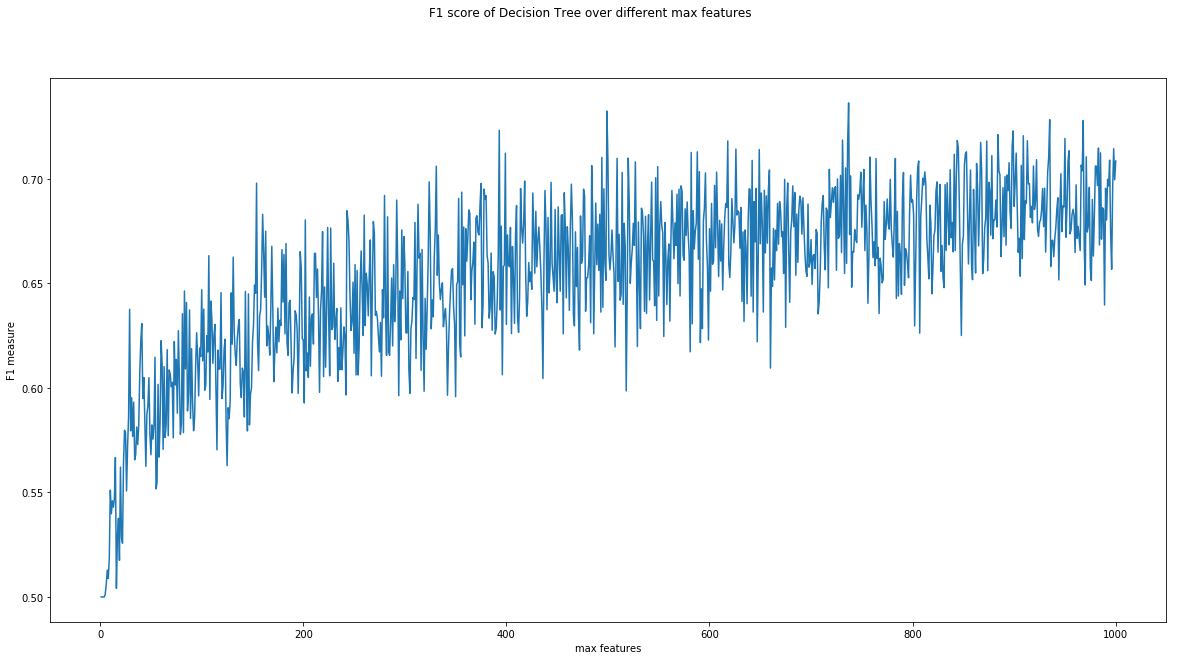

The best max features:  737


173

In [44]:
#Decision Tree
#tune max depth
depth_increase = 1
test_maxDepth = 1
f1_IMDB_dt_list_depth = []
depth_list = []
best_depth = 0
best_f1_depth = 0
for i in range(30):
    f1_IMDB_dt = f1_decision_tree(X_IMDB_train,y_IMDB_train,X_IMDB_valid,y_IMDB_valid,test_maxDepth,2,1,None)
    f1_IMDB_dt_list_depth.append(f1_IMDB_dt)
    depth_list.append(test_maxDepth)
    if(f1_IMDB_dt > best_f1_depth):
        best_f1_depth = f1_IMDB_dt
        best_depth = test_maxDepth
    test_maxDepth = int(test_maxDepth + depth_increase)

fig = plt.figure(10,figsize=(20,10))
fig.suptitle('F1 score of Decision Tree over different max depth')
plt.plot(depth_list,f1_IMDB_dt_list_depth)
plt.xlabel('max depth')
plt.ylabel('F1 measure')

print('The best max depth: ',best_depth)



#tune min split
split_increase = 0.1
test_split = 0.1
f1_IMDB_dt_list_split = []
split_list = []
best_split = 0
best_f1_split = 0
for i in range(10):
    f1_IMDB_dt = f1_decision_tree(X_IMDB_train,y_IMDB_train,X_IMDB_valid,y_IMDB_valid,best_depth,test_split,1,None)
    f1_IMDB_dt_list_split.append(f1_IMDB_dt)
    split_list.append(test_split)
    if(f1_IMDB_dt > best_f1_split):
        best_f1_split = f1_IMDB_dt
        best_split = test_split
    test_split = test_split + split_increase

fig = plt.figure(11,figsize=(20,10))
fig.suptitle('F1 score of Decision Tree over different min split')
plt.plot(split_list,f1_IMDB_dt_list_split)
plt.xlabel('min split')
plt.ylabel('F1 measure')
plt.show()

print('The best min split is: ', best_split)

#tune min leaf
leaf_increase = 0.02
test_leaf = 0.01
f1_IMDB_dt_list_leaf = []
leaf_list = []
best_leaf = 0
best_f1_leaf = 0
for i in range(25):
    f1_IMDB_dt = f1_decision_tree(X_IMDB_train,y_IMDB_train,X_IMDB_valid,y_IMDB_valid,best_depth,best_split,test_leaf,None)
    f1_IMDB_dt_list_leaf.append(f1_IMDB_dt)
    leaf_list.append(test_leaf)
    if(f1_IMDB_dt > best_f1_leaf):
        best_f1_leaf = f1_IMDB_dt
        best_leaf = test_leaf
    test_leaf = test_leaf + leaf_increase

fig = plt.figure(12,figsize=(20,10))
fig.suptitle('F1 score of Decision Tree over different min leaf')
plt.plot(leaf_list,f1_IMDB_dt_list_leaf)
plt.xlabel('min leaf')
plt.ylabel('F1 measure')
plt.show()

print('The best min leaf is: ', best_leaf)

#tune max_features
feature_increase = 1
test_feature = 1
f1_IMDB_dt_list_feature = []
feature_list = []
best_feature = 0
best_f1_feature = 0
for i in range(1000):
    f1_IMDB_dt = f1_decision_tree(X_IMDB_train,y_IMDB_train,X_IMDB_valid,y_IMDB_valid,best_depth,best_split,best_leaf,test_feature)
    f1_IMDB_dt_list_feature.append(f1_IMDB_dt)
    feature_list.append(test_feature)
    if(f1_IMDB_dt > best_f1_feature):
        best_f1_feature = f1_IMDB_dt
        best_feature = test_feature
    test_feature = test_feature + feature_increase

fig = plt.figure(13,figsize=(20,10))
fig.suptitle('F1 score of Decision Tree over different max features')
plt.plot(feature_list,f1_IMDB_dt_list_feature)
plt.xlabel('max features')
plt.ylabel('F1 measure')
plt.show()

print('The best max features: ', best_feature)


f = open('Assignment3_260540022_4_c_decision_tree_hyperparameter.txt','w')

f.write('The best max depth: ' + str(best_depth) + '\t' + '(range :' + '1 to 30)' + '\n'
+'The best min split is: ' +  str(best_split) + '\t' +'(range :' + '0 to 1)' + '\n'
+'The best min leaf is: ' + str(best_leaf) + '\t' +'(range :' + '0 to 0.5)' +'\n'
+'The best max features: ' + str(best_feature) + '\t' +'(range :' + '1 to 1000)')



The best intercept scaling:  1
The best max iteration:  9
The best max randome state:  40
The best max tolerance:  1e-06


187

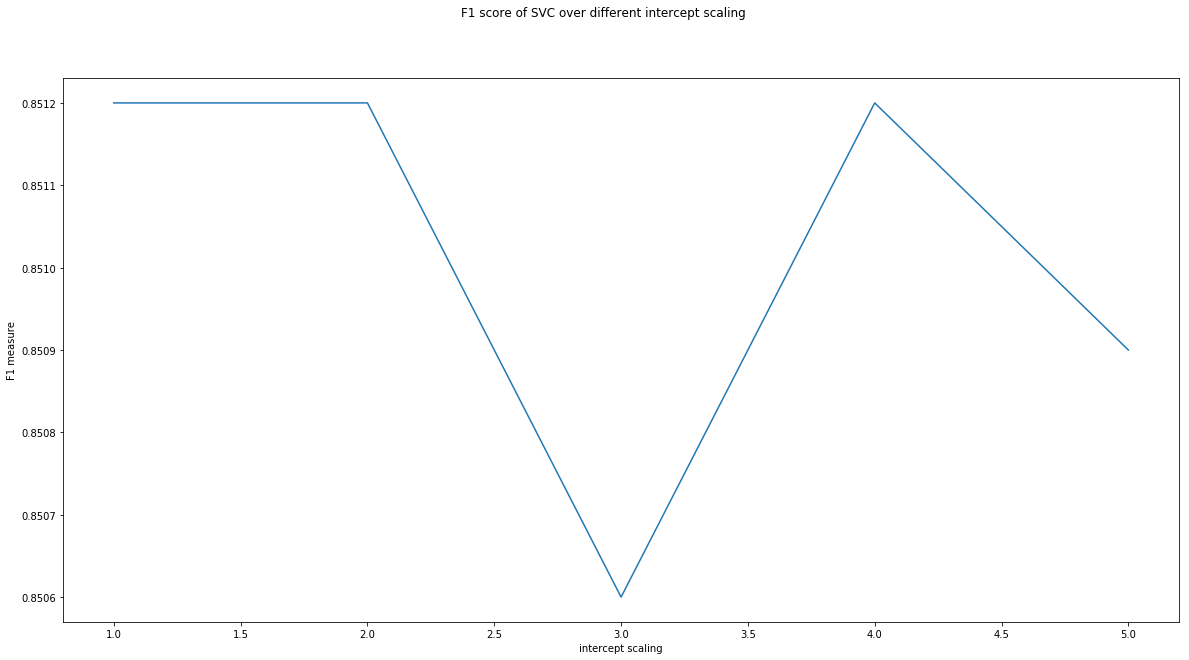

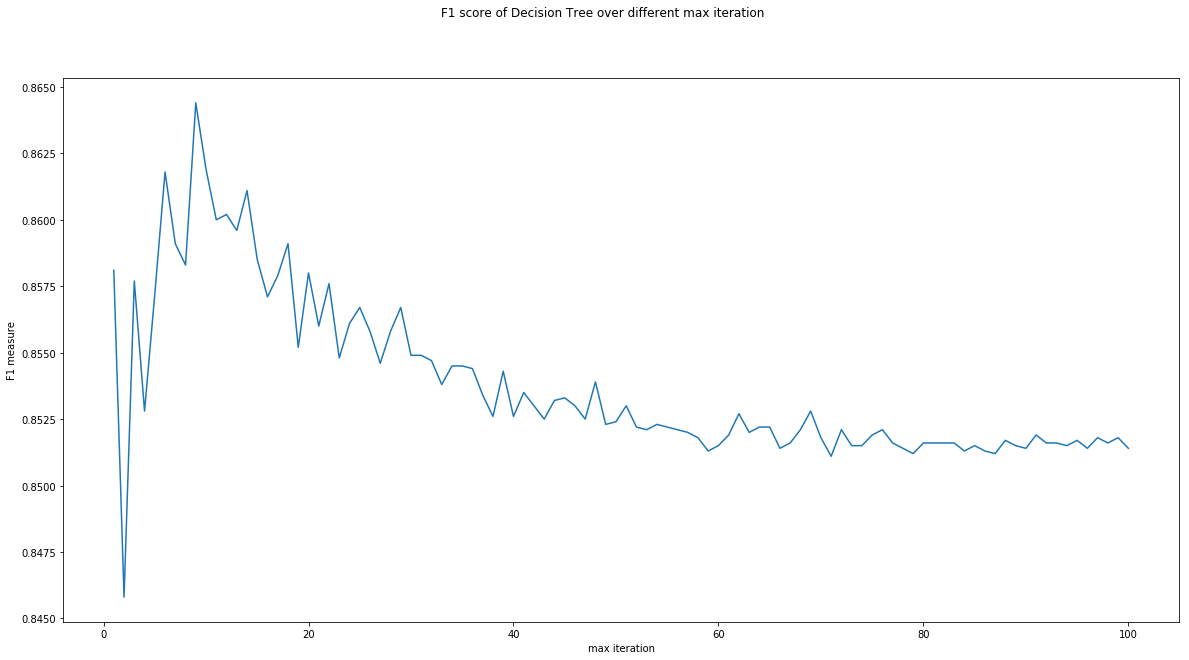

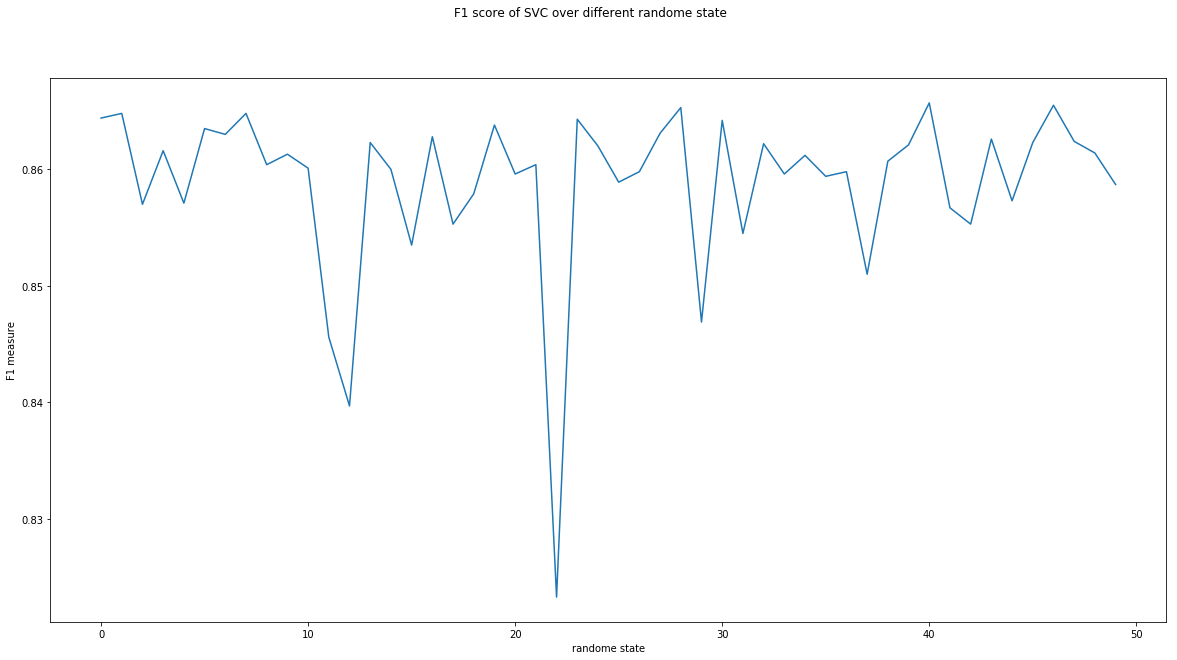

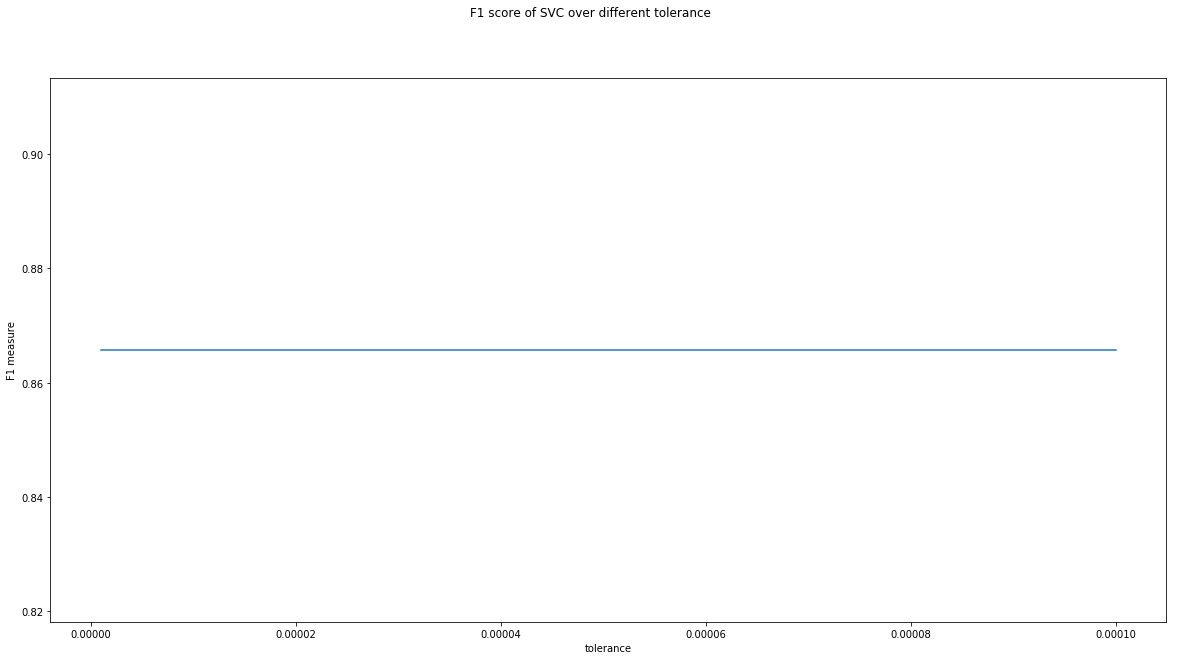

In [7]:
#linear SVC
#tune intercept scaling
is_increase = 1
test_is = 1
f1_IMDB_svc_list_is = []
is_list = []
best_is = 0
best_f1_is = 0
for i in range(5):
    f1_IMDB_svc = f1_svc(X_IMDB_train,y_IMDB_train,X_IMDB_valid,y_IMDB_valid,test_is,1000,0,1e-05)
    f1_IMDB_svc_list_is.append(f1_IMDB_svc)
    is_list.append(test_is)
    if(f1_IMDB_svc > best_f1_is):
        best_f1_is = f1_IMDB_svc
        best_is = test_is
    test_is = test_is + is_increase

fig = plt.figure(14,figsize=(20,10))
fig.suptitle('F1 score of SVC over different intercept scaling')
plt.plot(is_list,f1_IMDB_svc_list_is)
plt.xlabel('intercept scaling')
plt.ylabel('F1 measure')

print('The best intercept scaling: ',best_is)

#tune max iteration
iteration_increase = 1
test_iteration = 1
f1_IMDB_svc_list_iteration = []
iteration_list = []
best_iteration = 0
best_f1_iteration = 0
for i in range(100):
    f1_IMDB_svc = f1_svc(X_IMDB_train,y_IMDB_train,X_IMDB_valid,y_IMDB_valid,best_is,test_iteration,0,1e-05)
    f1_IMDB_svc_list_iteration.append(f1_IMDB_svc)
    iteration_list.append(test_iteration)
    if(f1_IMDB_svc > best_f1_iteration):
        best_f1_iteration = f1_IMDB_svc
        best_iteration = test_iteration
    test_iteration = test_iteration + iteration_increase

fig = plt.figure(15,figsize=(20,10))
fig.suptitle('F1 score of Decision Tree over different max iteration')
plt.plot(iteration_list,f1_IMDB_svc_list_iteration)
plt.xlabel('max iteration')
plt.ylabel('F1 measure')

print('The best max iteration: ',best_iteration)

#tune randome state
state_increase = 1
test_state = 0
f1_IMDB_svc_list_state = []
state_list = []
best_state = 0
best_f1_state = 0
for i in range(50):
    f1_IMDB_svc = f1_svc(X_IMDB_train,y_IMDB_train,X_IMDB_valid,y_IMDB_valid,best_is,best_iteration,test_state,1e-05)
    f1_IMDB_svc_list_state.append(f1_IMDB_svc)
    state_list.append(test_state)
    if(f1_IMDB_svc > best_f1_state):
        best_f1_state = f1_IMDB_svc
        best_state = test_state
    test_state = test_state + state_increase

fig = plt.figure(16,figsize=(20,10))
fig.suptitle('F1 score of SVC over different randome state')
plt.plot(state_list,f1_IMDB_svc_list_state)
plt.xlabel('randome state')
plt.ylabel('F1 measure')

print('The best max randome state: ',best_state)

#tune tolerance
tol_increase = 1e-6
test_tol = 1e-6
f1_IMDB_svc_list_tol = []
tol_list = []
best_tol = 0
best_f1_tol = 0
for i in range(100):
    f1_IMDB_svc = f1_svc(X_IMDB_train,y_IMDB_train,X_IMDB_valid,y_IMDB_valid,best_is,best_iteration,best_state,test_tol)
    f1_IMDB_svc_list_tol.append(f1_IMDB_svc)
    tol_list.append(test_tol)
    if(f1_IMDB_svc > best_f1_tol):
        best_f1_tol = f1_IMDB_svc
        best_tol = test_tol
    test_tol = test_tol + tol_increase

fig = plt.figure(17,figsize=(20,10))
fig.suptitle('F1 score of SVC over different tolerance')
plt.plot(tol_list,f1_IMDB_svc_list_tol)
plt.xlabel('tolerance')
plt.ylabel('F1 measure')

print('The best max tolerance: ',best_tol)

f = open('Assignment3_260540022_4_c_svm_hyperparameter.txt','w')

f.write('The best intercept scaling: ' + str(best_is) + '\t' + '(range :' + '1 to 50)' + '\n'
+'The best max iteration is: ' +  str(best_iteration) + '\t' +'(range :' + '1 to 100)' + '\n'
+'The best randome state is: ' + str(best_state) + '\t' +'(range :' + '1 to 100)' +'\n'
+'The best tolerance is: ' + str(best_tol) + '\t' +'(range :' + '1e-6 to 1e-3)')

In [10]:
best_alpha = 0.285
best_depth = 24
best_split = 0.2
best_leaf = 0.01
best_feature = 737
best_is = 1
best_iteration = 9
best_state = 40
best_tol = 1e-6

In [14]:
#d
#train set
#f1 for train data with tunned naive bayes 
f1_IMDB_nb_tunned_train = f1_NB(X_IMDB_train,y_IMDB_train,X_IMDB_train,y_IMDB_train,best_alpha)

#f1 for train data with tunned decision tree
f1_IMDB_dt_tunned_train = f1_decision_tree(X_IMDB_train,y_IMDB_train,X_IMDB_train,y_IMDB_train,best_depth,best_split,best_leaf,best_feature)

#f1 for train data with tunned svm
f1_IMDB_svc_tunned_train = f1_svc(X_IMDB_train,y_IMDB_train,X_IMDB_train,y_IMDB_train,best_is,best_iteration,best_state,best_tol)


#valid set
#f1 for train data with tunned naive bayes 
f1_IMDB_nb_tunned_valid = f1_NB(X_IMDB_train,y_IMDB_train,X_IMDB_valid,y_IMDB_valid,best_alpha)

#f1 for train data with tunned decision tree
f1_IMDB_dt_tunned_valid = f1_decision_tree(X_IMDB_train,y_IMDB_train,X_IMDB_valid,y_IMDB_valid,best_depth,best_split,best_leaf,best_feature)

#f1 for train data with tunned svm
f1_IMDB_svc_tunned_valid = f1_svc(X_IMDB_train,y_IMDB_train,X_IMDB_valid,y_IMDB_valid,best_is,best_iteration,best_state,best_tol)


#test set
#f1 for test data with tunned naive bayes
f1_IMDB_nb_tunned_test = f1_NB(X_IMDB_train,y_IMDB_train,X_IMDB_test,y_IMDB_test,best_alpha)

#f1 for test data with tunned decision tree
f1_IMDB_dt_tunned_test = f1_decision_tree(X_IMDB_train,y_IMDB_train,X_IMDB_test,y_IMDB_test,best_depth,best_split,best_leaf,best_feature)

#f1 for test data with tunned svm
f1_IMDB_svc_tunned_test  = f1_svc(X_IMDB_train,y_IMDB_train,X_IMDB_test,y_IMDB_test,best_is,best_iteration,best_state,best_tol)

f = open('Assignment3_4_d.txt','w')
f.write('Train perfformance: \n' + 'naive bayes: ' + str(f1_IMDB_nb_tunned_train) + '\n' + 'decision tree: ' + str(f1_IMDB_dt_tunned_train) + '\n' + 'svm: ' + str(f1_IMDB_svc_tunned_train) + '\n' +'\n'
+ 'Valid perfformance: \n' + 'naive bayes: ' + str(f1_IMDB_nb_tunned_valid) + '\n' + 'decision tree: ' + str(f1_IMDB_dt_tunned_valid) + '\n' + 'svm: ' + str(f1_IMDB_svc_tunned_valid) + '\n' + '\n'
+ 'Test perfformance: \n' + 'naive bayes: ' + str(f1_IMDB_nb_tunned_test) + '\n' + 'decision tree: ' + str(f1_IMDB_dt_tunned_test) + '\n' + 'svm: ' + str(f1_IMDB_svc_tunned_test))


print('IMDB nb train: ',f1_IMDB_nb_tunned_train)
print('IMDB dt train: ',f1_IMDB_dt_tunned_train)
print('IMDB svm train: ',f1_IMDB_svc_tunned_train)

print('IMDB nb valid: ',f1_IMDB_nb_tunned_valid)
print('IMDB dt valid: ',f1_IMDB_dt_tunned_valid)
print('IMDB svm valid: ',f1_IMDB_svc_tunned_valid)

print('IMDB nb test: ',f1_IMDB_nb_tunned_test)
print('IMDB dt test: ',f1_IMDB_dt_tunned_test)
print('IMDB svm test: ',f1_IMDB_svc_tunned_test)

BernoulliNB(alpha=0.285, binarize=0.0, class_prior=None, fit_prior=True)
BernoulliNB(alpha=0.285, binarize=0.0, class_prior=None, fit_prior=True)
BernoulliNB(alpha=0.285, binarize=0.0, class_prior=None, fit_prior=True)
IMDB nb train:  0.8723333333333333
IMDB dt train:  0.6882
IMDB svm train:  0.9871333333333333
IMDB nb valid:  0.8485
IMDB dt valid:  0.6722
IMDB svm valid:  0.8657
IMDB nb test:  0.83632
IMDB dt test:  0.70136
IMDB svm test:  0.85144


In [2]:
#Q5
#a.
IMDB_train_file = open('hwk3_datasets/IMDB-train.txt')
IMDB_vocab = sort(load_text(IMDB_train_file))
write_txt(IMDB_vocab,open("IMDB-modified/IMDB-vocab.txt",'w'))

IMDB_map = hashMap(IMDB_vocab)

IMDB_train_review = modify(open('hwk3_datasets/IMDB-train.txt'),IMDB_map)
IMDB_valid_review = modify(open('hwk3_datasets/IMDB-valid.txt'),IMDB_map)
IMDB_test_review = modify(open('hwk3_datasets/IMDB-test.txt'),IMDB_map)

write_train_valid_test(IMDB_train_review,open('IMDB-modified/IMDB_train.txt','w'))
write_train_valid_test(IMDB_valid_review,open('IMDB-modified/IMDB_valid.txt','w'))
write_train_valid_test(IMDB_test_review,open('IMDB-modified/IMDB_test.txt','w'))



fbow_IMDB_train = FBoW(IMDB_train_review)
fbow_IMDB_valid = FBoW(IMDB_valid_review)
fbow_IMDB_test = FBoW(IMDB_test_review)

IMDB_valid_classes = get_classes(IMDB_valid_review)
IMDB_train_classes = get_classes(IMDB_train_review)
IMDB_test_classes = get_classes(IMDB_test_review)

X_IMDB_train_fre = np.array(fbow_IMDB_train)
y_IMDB_train_fre = np.array( IMDB_train_classes )

X_IMDB_valid_fre = np.array( fbow_IMDB_valid )
y_IMDB_valid_fre = np.array( IMDB_valid_classes )

X_IMDB_test_fre = np.array( fbow_IMDB_test )
y_IMDB_test_fre = np.array( IMDB_test_classes )

#Naive Bayes
#tune best alpha
f1_IMDB_nb_train_freq = f1_Gaussian_NB(X_IMDB_train_fre,y_IMDB_train_fre,X_IMDB_test_fre,y_IMDB_test_fre)

print('Naive Bayes: ',f1_IMDB_nb_train_freq)

Naive Bayes:  0.6874


The best max depth:  15


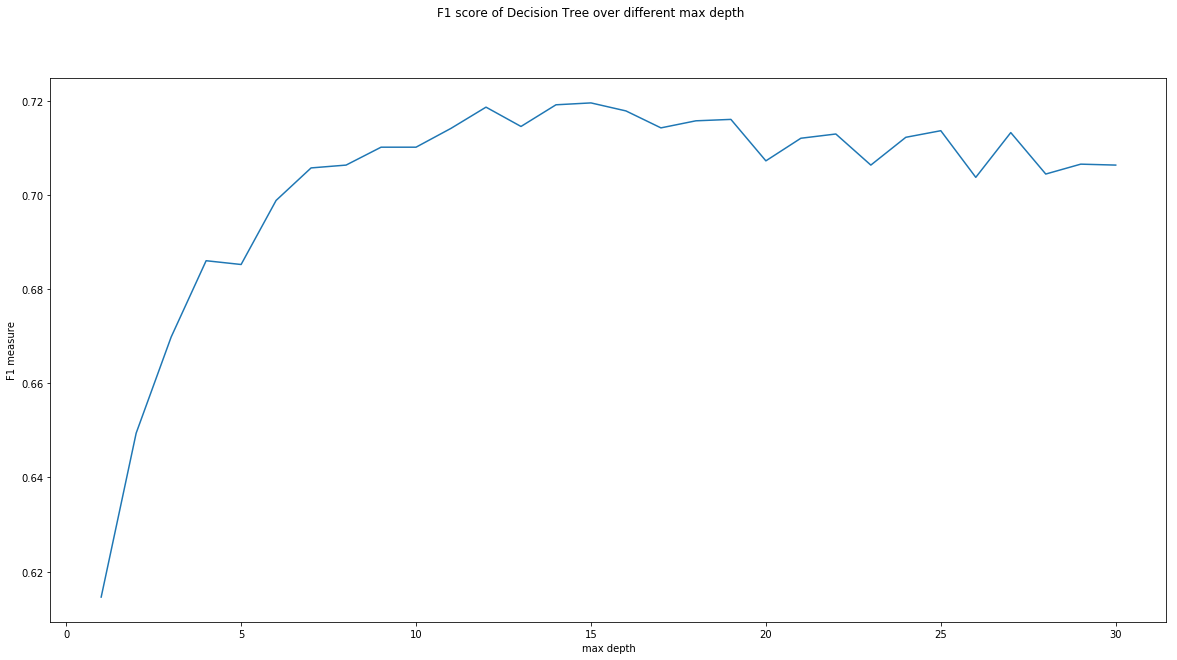

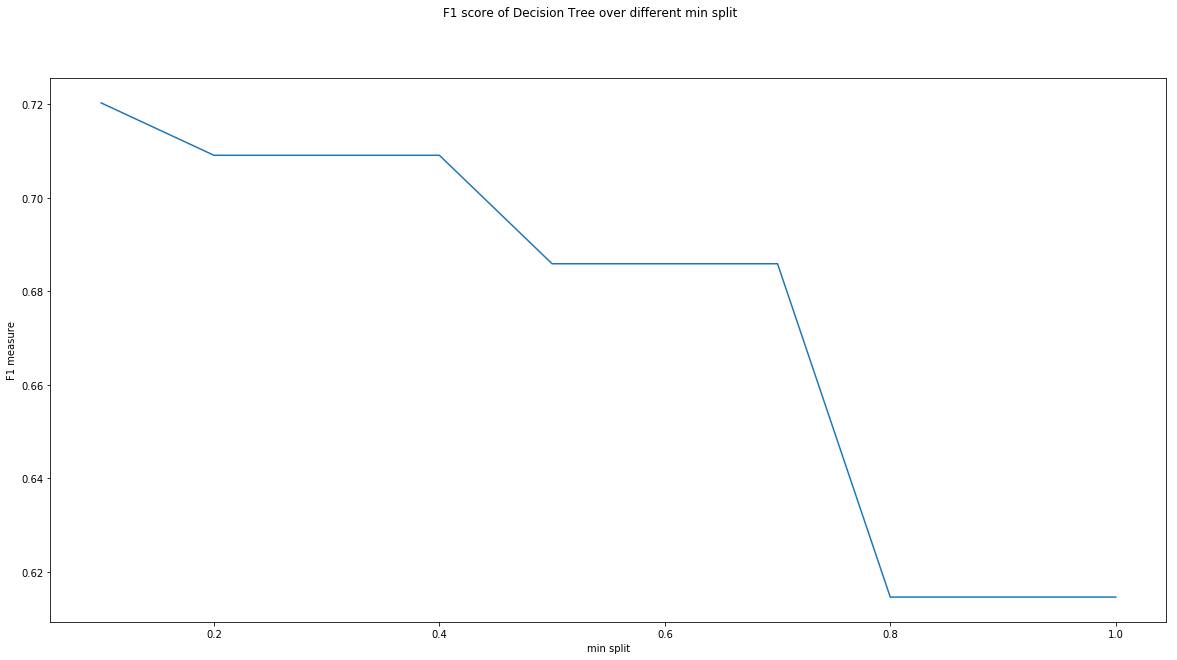

The best min split is:  0.1


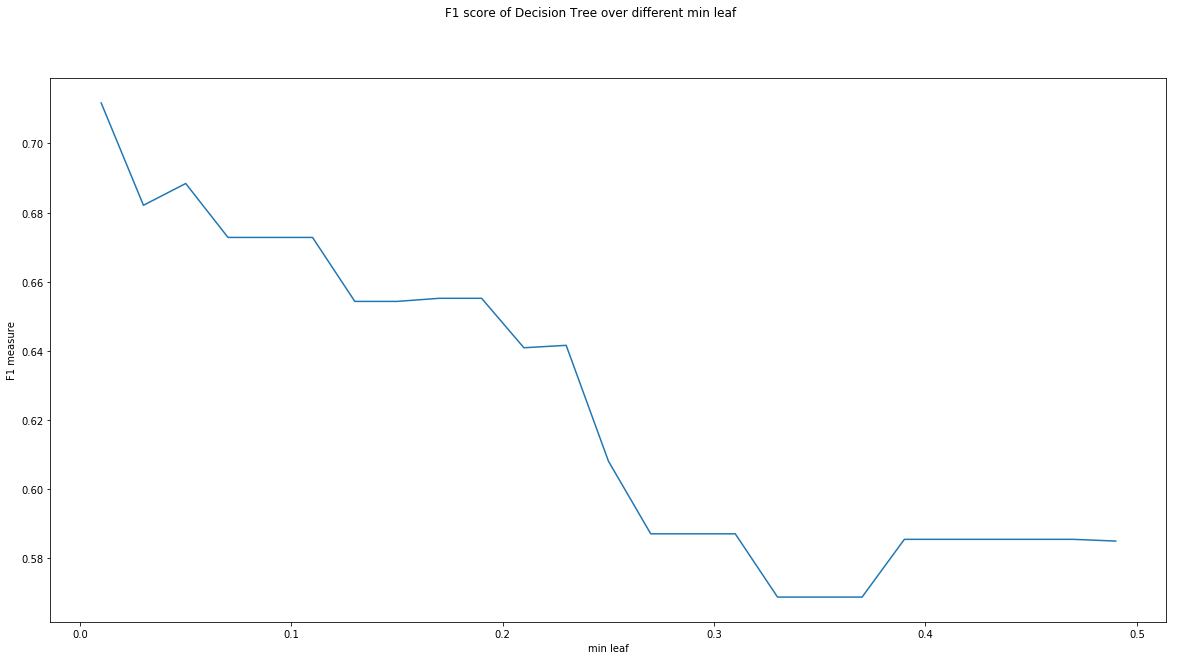

The best min leaf is:  0.01


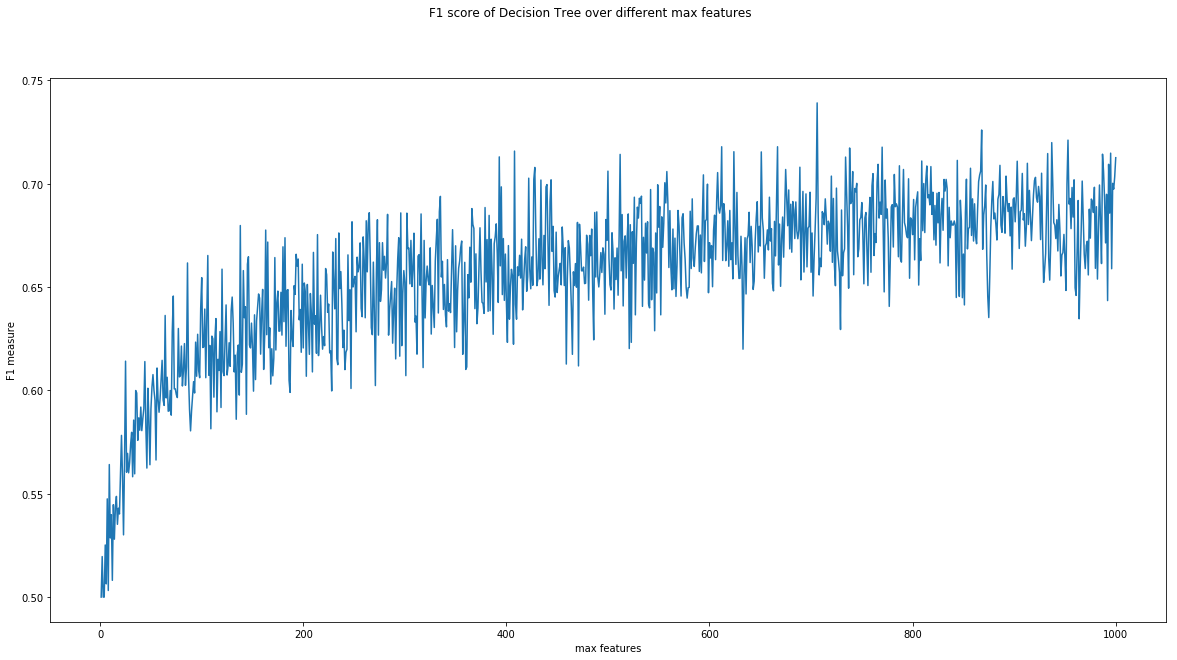

The best max features:  706


173

In [3]:
#Decision Tree
#tune max depth
depth_increase = 1
test_maxDepth = 1
f1_IMDB_dt_list_depth = []
depth_list = []
best_depth = 0
best_f1_depth = 0
for i in range(30):
    f1_IMDB_dt = f1_decision_tree(X_IMDB_train_fre,y_IMDB_train_fre,X_IMDB_valid_fre,y_IMDB_valid_fre,test_maxDepth,2,1,None)
    f1_IMDB_dt_list_depth.append(f1_IMDB_dt)
    depth_list.append(test_maxDepth)
    if(f1_IMDB_dt > best_f1_depth):
        best_f1_depth = f1_IMDB_dt
        best_depth = test_maxDepth
    test_maxDepth = int(test_maxDepth + depth_increase)

fig = plt.figure(20,figsize=(20,10))
fig.suptitle('F1 score of Decision Tree over different max depth')
plt.plot(depth_list,f1_IMDB_dt_list_depth)
plt.xlabel('max depth')
plt.ylabel('F1 measure')

print('The best max depth: ',best_depth)



#tune min split
split_increase = 0.1
test_split = 0.1
f1_IMDB_dt_list_split = []
split_list = []
best_split = 0
best_f1_split = 0
for i in range(10):
    f1_IMDB_dt = f1_decision_tree(X_IMDB_train_fre,y_IMDB_train_fre,X_IMDB_valid_fre,y_IMDB_valid_fre,best_depth,test_split,1,None)
    f1_IMDB_dt_list_split.append(f1_IMDB_dt)
    split_list.append(test_split)
    if(f1_IMDB_dt > best_f1_split):
        best_f1_split = f1_IMDB_dt
        best_split = test_split
    test_split = test_split + split_increase

fig = plt.figure(21,figsize=(20,10))
fig.suptitle('F1 score of Decision Tree over different min split')
plt.plot(split_list,f1_IMDB_dt_list_split)
plt.xlabel('min split')
plt.ylabel('F1 measure')
plt.show()

print('The best min split is: ', best_split)

#tune min leaf
leaf_increase = 0.02
test_leaf = 0.01
f1_IMDB_dt_list_leaf = []
leaf_list = []
best_leaf = 0
best_f1_leaf = 0
for i in range(25):
    f1_IMDB_dt = f1_decision_tree(X_IMDB_train_fre,y_IMDB_train_fre,X_IMDB_valid_fre,y_IMDB_valid_fre,best_depth,best_split,test_leaf,None)
    f1_IMDB_dt_list_leaf.append(f1_IMDB_dt)
    leaf_list.append(test_leaf)
    if(f1_IMDB_dt > best_f1_leaf):
        best_f1_leaf = f1_IMDB_dt
        best_leaf = test_leaf
    test_leaf = test_leaf + leaf_increase

fig = plt.figure(22,figsize=(20,10))
fig.suptitle('F1 score of Decision Tree over different min leaf')
plt.plot(leaf_list,f1_IMDB_dt_list_leaf)
plt.xlabel('min leaf')
plt.ylabel('F1 measure')
plt.show()

print('The best min leaf is: ', best_leaf)

#tune max_features
feature_increase = 1
test_feature = 1
f1_IMDB_dt_list_feature = []
feature_list = []
best_feature = 0
best_f1_feature = 0
for i in range(1000):
    f1_IMDB_dt = f1_decision_tree(X_IMDB_train_fre,y_IMDB_train_fre,X_IMDB_valid_fre,y_IMDB_valid_fre,best_depth,best_split,best_leaf,test_feature)
    f1_IMDB_dt_list_feature.append(f1_IMDB_dt)
    feature_list.append(test_feature)
    if(f1_IMDB_dt > best_f1_feature):
        best_f1_feature = f1_IMDB_dt
        best_feature = test_feature
    test_feature = test_feature + feature_increase

fig = plt.figure(23,figsize=(20,10))
fig.suptitle('F1 score of Decision Tree over different max features')
plt.plot(feature_list,f1_IMDB_dt_list_feature)
plt.xlabel('max features')
plt.ylabel('F1 measure')
plt.show()

print('The best max features: ', best_feature)


f = open('Assignment3_260540022_5_b_decision_tree_hyperparameter.txt','w')

f.write('The best max depth: ' + str(best_depth) + '\t' + '(range :' + '1 to 30)' + '\n'
+'The best min split is: ' +  str(best_split) + '\t' +'(range :' + '0 to 1)' + '\n'
+'The best min leaf is: ' + str(best_leaf) + '\t' +'(range :' + '0 to 0.5)' +'\n'
+'The best max features: ' + str(best_feature) + '\t' +'(range :' + '1 to 1000)')


The best intercept scaling:  7
The best max iteration:  94
The best max randome state:  0
The best max tolerance:  1e-06


187

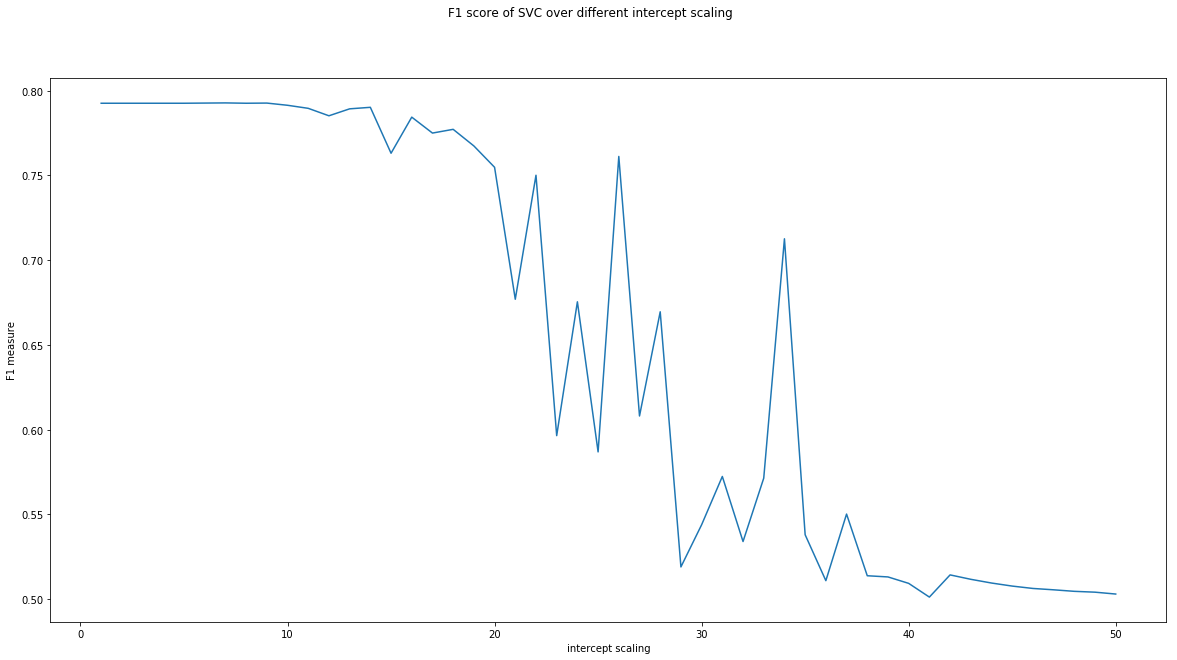

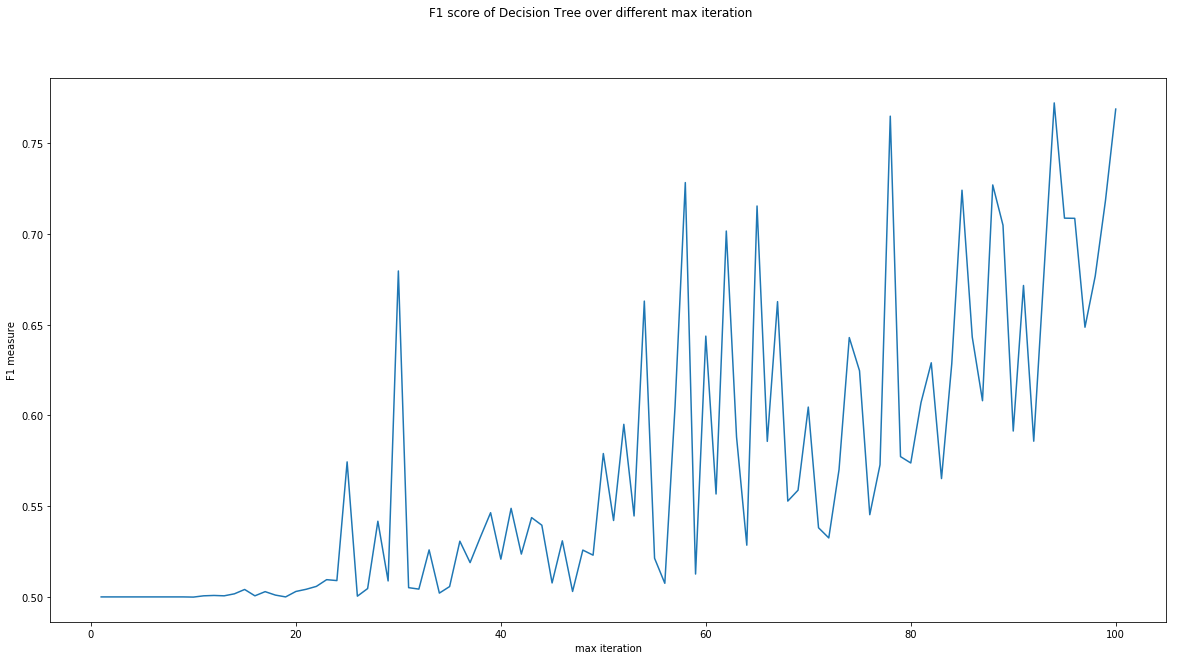

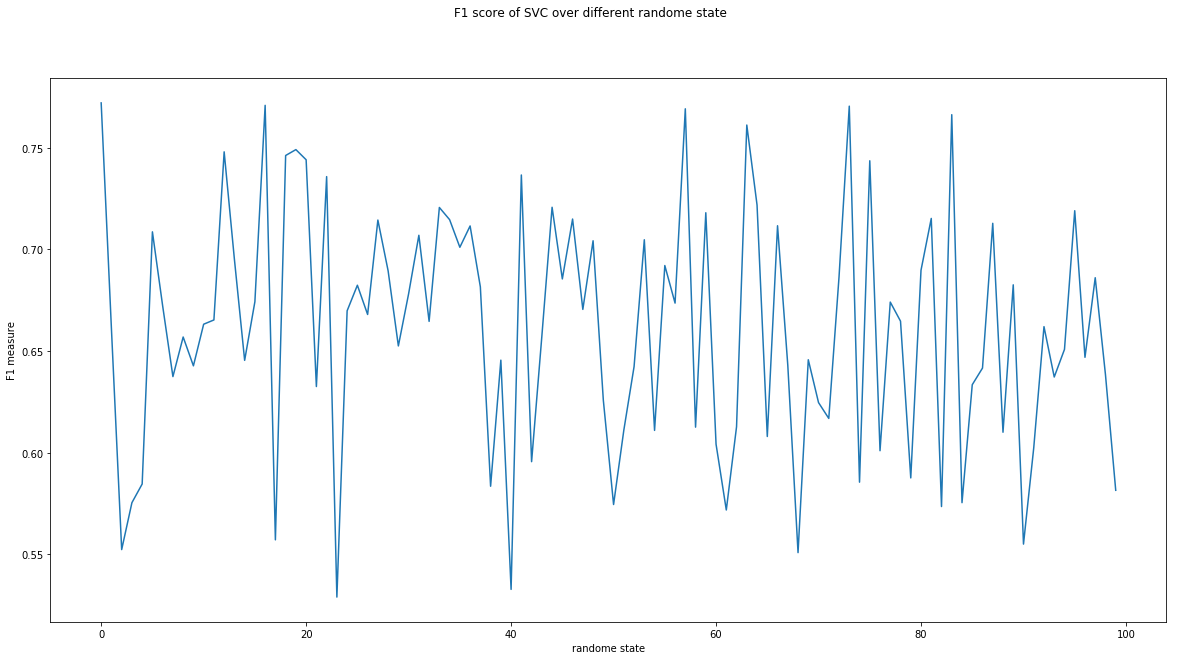

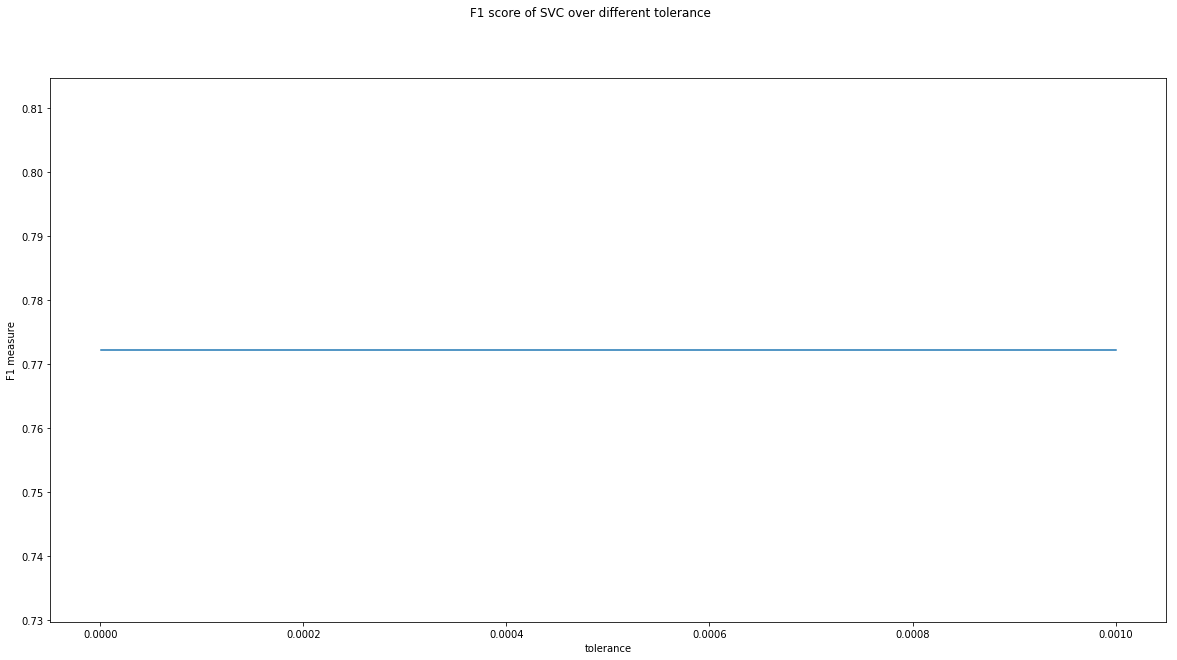

In [5]:
#linear SVC
#tune intercept scaling
is_increase = 1
test_is = 1
f1_IMDB_svc_list_is = []
is_list = []
best_is = 0
best_f1_is = 0
for i in range(50):
    f1_IMDB_svc = f1_svc(X_IMDB_train_fre,y_IMDB_train_fre,X_IMDB_valid_fre,y_IMDB_valid_fre,test_is,1000,0,1e-05)
    f1_IMDB_svc_list_is.append(f1_IMDB_svc)
    is_list.append(test_is)
    if(f1_IMDB_svc > best_f1_is):
        best_f1_is = f1_IMDB_svc
        best_is = test_is
    test_is = test_is + is_increase

fig = plt.figure(24,figsize=(20,10))
fig.suptitle('F1 score of SVC over different intercept scaling')
plt.plot(is_list,f1_IMDB_svc_list_is)
plt.xlabel('intercept scaling')
plt.ylabel('F1 measure')


print('The best intercept scaling: ',best_is)

#tune max iteration
iteration_increase = 1
test_iteration = 1
f1_IMDB_svc_list_iteration = []
iteration_list = []
best_iteration = 0
best_f1_iteration = 0
for i in range(100):
    f1_IMDB_svc = f1_svc(X_IMDB_train_fre,y_IMDB_train_fre,X_IMDB_valid_fre,y_IMDB_valid_fre,best_is,test_iteration,0,1e-05)
    f1_IMDB_svc_list_iteration.append(f1_IMDB_svc)
    iteration_list.append(test_iteration)
    if(f1_IMDB_svc > best_f1_iteration):
        best_f1_iteration = f1_IMDB_svc
        best_iteration = test_iteration
    test_iteration = test_iteration + iteration_increase

fig = plt.figure(25,figsize=(20,10))
fig.suptitle('F1 score of Decision Tree over different max iteration')
plt.plot(iteration_list,f1_IMDB_svc_list_iteration)
plt.xlabel('max iteration')
plt.ylabel('F1 measure')

print('The best max iteration: ',best_iteration)

#tune randome state
state_increase = 1
test_state = 0
f1_IMDB_svc_list_state = []
state_list = []
best_state = 0
best_f1_state = 0
for i in range(100):
    f1_IMDB_svc = f1_svc(X_IMDB_train_fre,y_IMDB_train_fre,X_IMDB_valid_fre,y_IMDB_valid_fre,best_is,best_iteration,test_state,1e-05)
    f1_IMDB_svc_list_state.append(f1_IMDB_svc)
    state_list.append(test_state)
    if(f1_IMDB_svc > best_f1_state):
        best_f1_state = f1_IMDB_svc
        best_state = test_state
    test_state = test_state + state_increase

fig = plt.figure(26,figsize=(20,10))
fig.suptitle('F1 score of SVC over different randome state')
plt.plot(state_list,f1_IMDB_svc_list_state)
plt.xlabel('randome state')
plt.ylabel('F1 measure')

print('The best max randome state: ',best_state)

#tune tolerance
tol_increase = 1e-6
test_tol = 1e-6
f1_IMDB_svc_list_tol = []
tol_list = []
best_tol = 0
best_f1_tol = 0
for i in range(1000):
    f1_IMDB_svc = f1_svc(X_IMDB_train_fre,y_IMDB_train_fre,X_IMDB_valid_fre,y_IMDB_valid_fre,best_is,best_iteration,best_state,test_tol)
    f1_IMDB_svc_list_tol.append(f1_IMDB_svc)
    tol_list.append(test_tol)
    if(f1_IMDB_svc > best_f1_tol):
        best_f1_tol = f1_IMDB_svc
        best_tol = test_tol
    test_tol = test_tol + tol_increase

fig = plt.figure(27,figsize=(20,10))
fig.suptitle('F1 score of SVC over different tolerance')
plt.plot(tol_list,f1_IMDB_svc_list_tol)
plt.xlabel('tolerance')
plt.ylabel('F1 measure')

print('The best max tolerance: ',best_tol)

f = open('Assignment3_260540022_5_b_svm_hyperparameter.txt','w')

f.write('The intercept scaling: ' + str(best_is) + '\t' + '(range :' + '1 to 50)' + '\n'
+'The best max iteration is: ' +  str(best_iteration) + '\t' +'(range :' + '1 to 100)' + '\n'
+'The best randome state is: ' + str(best_state) + '\t' +'(range :' + '1 to 100)' +'\n'
+'The best tolerance is: ' + str(best_tol) + '\t' +'(range :' + '1e-6 to 1e-3)')



In [7]:
#c
#train set
#f1 for train data with tunned naive bayes 
f1_IMDB_nb_tunned_train_f = f1_Gaussian_NB(X_IMDB_train_fre,y_IMDB_train_fre,X_IMDB_train_fre,y_IMDB_train_fre)

#f1 for train data with tunned decision tree
f1_IMDB_dt_tunned_train_f = f1_decision_tree(X_IMDB_train_fre,y_IMDB_train_fre,X_IMDB_train_fre,y_IMDB_train_fre,best_depth,best_split,best_leaf,best_feature)

#f1 for train data with tunned svm
f1_IMDB_svc_tunned_train_f = f1_svc(X_IMDB_train_fre,y_IMDB_train_fre,X_IMDB_train_fre,y_IMDB_train_fre,best_is,best_iteration,best_state,best_tol)


#valid set
#f1 for train data with tunned naive bayes 
f1_IMDB_nb_tunned_valid_f = f1_Gaussian_NB(X_IMDB_train_fre,y_IMDB_train_fre,X_IMDB_valid_fre,y_IMDB_valid_fre)

#f1 for train data with tunned decision tree
f1_IMDB_dt_tunned_valid_f = f1_decision_tree(X_IMDB_train_fre,y_IMDB_train_fre,X_IMDB_valid_fre,y_IMDB_valid_fre,best_depth,best_split,best_leaf,best_feature)

#f1 for train data with tunned svm
f1_IMDB_svc_tunned_valid_f = f1_yelp_svc = f1_svc(X_IMDB_train_fre,y_IMDB_train_fre,X_IMDB_valid_fre,y_IMDB_valid_fre,best_is,best_iteration,best_state,best_tol)


#test set
#f1 for test data with tunned naive bayes
f1_IMDB_nb_tunned_test_f = f1_Gaussian_NB(X_IMDB_train_fre,y_IMDB_train_fre,X_IMDB_test_fre,y_IMDB_test_fre)

#f1 for test data with tunned decision tree
f1_IMDB_dt_tunned_test_f = f1_decision_tree(X_IMDB_train_fre,y_IMDB_train_fre,X_IMDB_test_fre,y_IMDB_test_fre,best_depth,best_split,best_leaf,best_feature)

#f1 for test data with tunned svm
f1_IMDB_svc_tunned_test_f = f1_yelp_svc = f1_svc(X_IMDB_train_fre,y_IMDB_train_fre,X_IMDB_test_fre,y_IMDB_test_fre,best_is,best_iteration,best_state,best_tol)

f = open('Assignment3_5_c.txt','w')
f.write('Train perfformance: \n' + 'naive bayes: ' + str(f1_IMDB_nb_tunned_train_f) + '\n' + 'decision tree: ' + str(f1_IMDB_dt_tunned_train_f) + '\n' + 'svm: ' + str(f1_IMDB_svc_tunned_train_f) + '\n' +'\n'
+ 'Valid perfformance: \n' + 'naive bayes: ' + str(f1_IMDB_nb_tunned_valid_f) + '\n' + 'decision tree: ' + str(f1_IMDB_dt_tunned_valid_f) + '\n' + 'svm: ' + str(f1_IMDB_svc_tunned_valid_f) + '\n' + '\n'
+ 'Test perfformance: \n' + 'naive bayes: ' + str(f1_IMDB_nb_tunned_test_f) + '\n' + 'decision tree: ' + str(f1_IMDB_dt_tunned_test_f) + '\n' + 'svm: ' + str(f1_IMDB_svc_tunned_test_f))



298